In [459]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [460]:
import os
os.chdir('C:\\Users\\Admin\\Desktop\\Virtual Internship\\KPMG')

In [461]:
Transactions= pd.read_excel('KPMG_raw.xlsx',
                  sheet_name= 'Transactions', 
                  header=1)
CustomerDemo= pd.read_excel('KPMG_raw.xlsx',
                  sheet_name= "CustomerDemographic", 
                  header=1)
CustomerAddress= pd.read_excel('KPMG_raw.xlsx',
                  sheet_name= 'CustomerAddress', 
                  header=1)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  


In [462]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [463]:
def Time(ExcelFloat):
    seconds= (ExcelFloat - 25569) * 86400.0
    PythonDate= datetime.datetime.utcfromtimestamp(seconds).strftime("%Y-%m-%d")
    return PythonDate
Transactions['product_first_sold_date']= Transactions['product_first_sold_date'].map(lambda x: Time(x),  na_action='ignore')
Transactions.head(10)

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   
5               6          25         2339       2017-03-08           1.0   
6               7          22         1542       2017-04-21           1.0   
7               8          15         2459       2017-07-15           0.0   
8               9          67         1305       2017-08-10           0.0   
9              10          12         3262       2017-08-30           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   
5     Approved  Giant Bicycles         Road        medium       medium   
6     Approved        WeareA2B     Standard        medium       medium   
7     Approved        WeareA2B     Standard        medium       medium   
8     Approved           Solex     Standard        medium        large   
9     Approved        WeareA2B     Standard        medium       medium   

   list_price  standard_cost product_first_sold_date  
0       71.49          53.62              2012-12-02  
1     2091.47         388.92              2014-03-03  
2     1793.43         248.82              1999-07-20  
3     1198.46         381.10              1998-12-16  
4     1765.30         709.48              2015-08-10  
5     1538.99         829.65              2006-11-10  
6       60.34          45.26              1993-07-15  
7     1292.84          13.44              2009-04-12  
8     1071.23         380.74              1991-08-05  
9     1231.15         161.60              2004-08-17

In [464]:
Transactions.nunique(axis= 0)

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [465]:
Transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [466]:
#Check missing values
Transactions[Transactions['brand'].isnull() & Transactions['product_line'].isnull() & Transactions['product_class'].isnull() & Transactions['product_size'].isnull()]


transaction_id  product_id  customer_id transaction_date  online_order  \
136               137           0          431       2017-09-23           0.0   
159               160           0         3300       2017-08-27           0.0   
366               367           0         1614       2017-03-10           0.0   
406               407           0         2559       2017-06-14           1.0   
676               677           0         2609       2017-07-02           0.0   
...               ...         ...          ...              ...           ...   
19340           19341           0          443       2017-12-26           1.0   
19383           19384           0         2407       2017-06-11           0.0   
19793           19794           0         2860       2017-01-13           0.0   
19859           19860           0         2468       2017-06-24           1.0   
19871           19872           0           61       2017-03-17           1.0   

      order_status brand product_line product_class product_size  list_price  \
136       Approved   NaN          NaN           NaN          NaN     1942.61   
159       Approved   NaN          NaN           NaN          NaN     1656.86   
366       Approved   NaN          NaN           NaN          NaN      850.89   
406       Approved   NaN          NaN           NaN          NaN      710.59   
676       Approved   NaN          NaN           NaN          NaN     1972.01   
...            ...   ...          ...           ...          ...         ...   
19340     Approved   NaN          NaN           NaN          NaN      744.54   
19383     Approved   NaN          NaN           NaN          NaN     1098.18   
19793     Approved   NaN          NaN           NaN          NaN      868.56   
19859     Approved   NaN          NaN           NaN          NaN     1497.43   
19871     Approved   NaN          NaN           NaN          NaN      867.92   

       standard_cost product_first_sold_date  
136              NaN                     NaN  
159              NaN                     NaN  
366              NaN                     NaN  
406              NaN                     NaN  
676              NaN                     NaN  
...              ...                     ...  
19340            NaN                     NaN  
19383            NaN                     NaN  
19793            NaN                     NaN  
19859            NaN                     NaN  
19871            NaN                     NaN  

[197 rows x 13 columns]

array([[<AxesSubplot:xlabel='list_price', ylabel='list_price'>,
        <AxesSubplot:xlabel='standard_cost', ylabel='list_price'>],
       [<AxesSubplot:xlabel='list_price', ylabel='standard_cost'>,
        <AxesSubplot:xlabel='standard_cost', ylabel='standard_cost'>]],
      dtype=object)

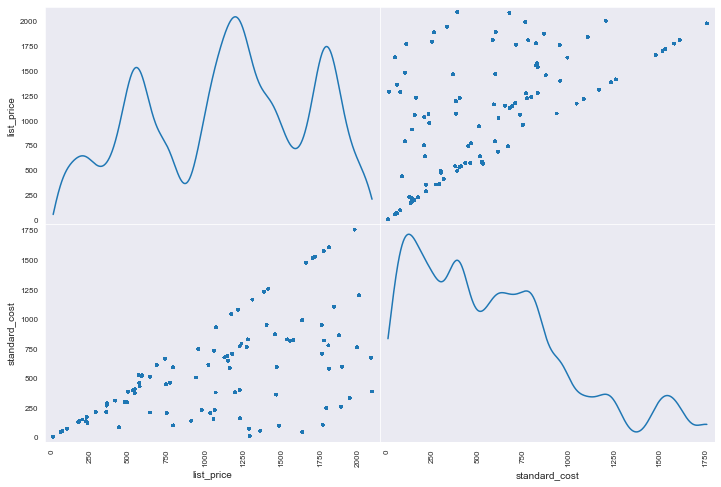

In [467]:
from pandas.plotting import scatter_matrix
attributes = ["list_price", "standard_cost"]#, 'profit']#, "transaction_date","product_id", "product_first_sold_date"] 
scatter_matrix(Transactions[attributes], figsize=(12, 8), diagonal= 'kde')

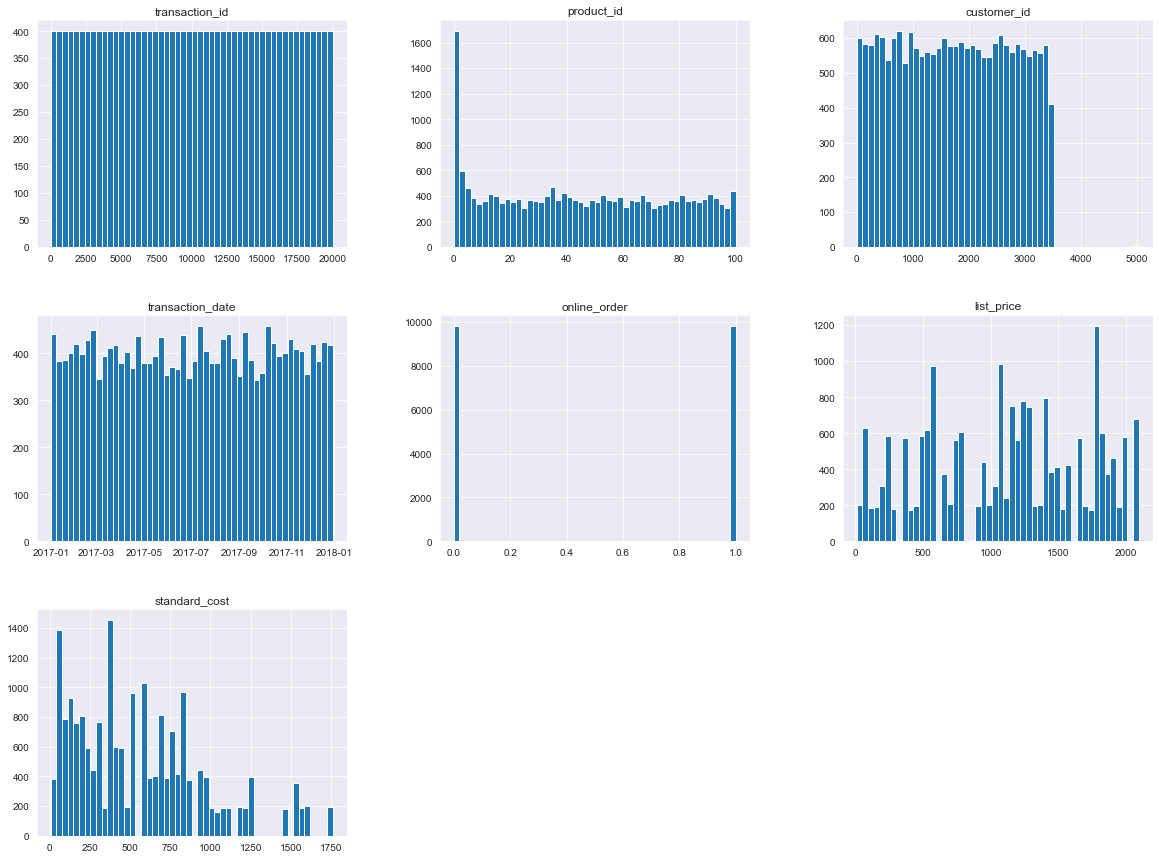

In [468]:
%matplotlib inline   
import matplotlib.pyplot as plt
Transactions.hist(bins=50,figsize=(20,15))
plt.show()

In [469]:
Transactions['product_id'].value_counts().sort_values()

47      121
100     130
8       136
16      136
71      137
       ... 
38      267
35      268
1       311
3       354
0      1378
Name: product_id, Length: 101, dtype: int64

In [470]:
Transactions.corr()

transaction_id  product_id  customer_id  online_order  \
transaction_id        1.000000   -0.011486     0.001753      0.003394   
product_id           -0.011486    1.000000     0.004278     -0.004233   
customer_id           0.001753    0.004278     1.000000      0.001616   
online_order          0.003394   -0.004233     0.001616      1.000000   
list_price           -0.006154    0.090066     0.009306     -0.000295   
standard_cost        -0.003291    0.038765     0.005365      0.006934   

                list_price  standard_cost  
transaction_id   -0.006154      -0.003291  
product_id        0.090066       0.038765  
customer_id       0.009306       0.005365  
online_order     -0.000295       0.006934  
list_price        1.000000       0.551539  
standard_cost     0.551539       1.000000

In [471]:
#Since all of missing product information have product id 0, check product id = 0
#Product_id0= Transactions[['product_id', 'list_price', 'standard_cost']]
Product_id0= Transactions[Transactions['product_id']== 0]
Product_id0.corr()

transaction_id  product_id  customer_id  online_order  \
transaction_id        1.000000         NaN    -0.032233      0.061190   
product_id                 NaN         NaN          NaN           NaN   
customer_id          -0.032233         NaN     1.000000     -0.012742   
online_order          0.061190         NaN    -0.012742      1.000000   
list_price            0.009176         NaN    -0.039368     -0.007883   
standard_cost        -0.052119         NaN     0.013804     -0.010678   

                list_price  standard_cost  
transaction_id    0.009176      -0.052119  
product_id             NaN            NaN  
customer_id      -0.039368       0.013804  
online_order     -0.007883      -0.010678  
list_price        1.000000       0.931967  
standard_cost     0.931967       1.000000

In [472]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
model = smf.ols('standard_cost~ list_price', data= Product_id0).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          standard_cost   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     7791.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:37:56   Log-Likelihood:                -6312.6
No. Observations:                1181   AIC:                         1.263e+04
Df Residuals:                    1179   BIC:                         1.264e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.7453      2.923     -1.966      0.050     -11.480      -0.011
list_price     0.7263      0.008     88.267      0.000       0.710       0.742
==============================================================================
Omnibus:                      602.978   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6055.132
Skew:                          -2.136   Prob(JB):                         0.00
Kurtosis:                      13.237   Cond. No.                         703.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [473]:
#Acceptable fit -> Impute missing values by linear regression

In [474]:
ImpDf= Product_id0[['list_price', 'standard_cost']]

from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#fit lr

lr= LinearRegression()
imp = IterativeImputer(estimator= lr)
imp.fit(ImpDf)
#transform
ImpArr= imp.transform(ImpDf)
ImpDf= pd.DataFrame(ImpArr, columns= ImpDf.columns, index= ImpDf.index)

#Concat
Product_id0.drop(['list_price', 'standard_cost'], axis= 1, inplace= True)
Product_id0= pd.concat([Product_id0, ImpDf], axis= 1)

Transactions= Transactions[Transactions['product_id']!=0]
Transactions= pd.concat([Transactions, Product_id0], axis= 0)


C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [475]:
Transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost                0
product_first_sold_date    197
dtype: int64

In [476]:
#Add feature profit
Transactions['profit']= Transactions['list_price']-Transactions['standard_cost']

<AxesSubplot:ylabel='Frequency'>

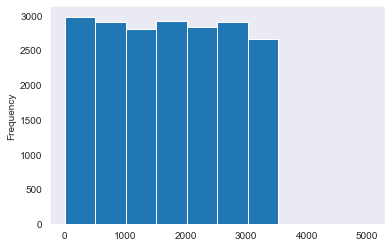

In [477]:
Transactions['customer_id'].plot(kind= 'hist')

In [478]:
#This customer should not be included
Transactions.loc[Transactions['customer_id'].max()]

transaction_id                            5035
product_id                                   0
customer_id                               1839
transaction_date           2017-07-25 00:00:00
online_order                               0.0
order_status                          Approved
brand                           Norco Bicycles
product_line                              Road
product_class                           medium
product_size                            medium
list_price                              544.05
standard_cost                           376.84
product_first_sold_date             2000-05-22
profit                                  167.21
Name: 5034, dtype: object

In [479]:
#Transactions data of the first 3500 customers

Product Exploration

<AxesSubplot:xlabel='brand', ylabel='profit'>

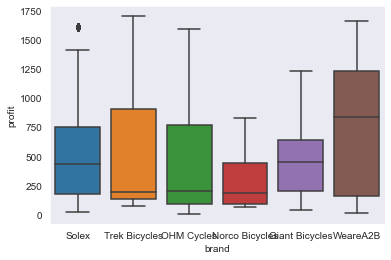

In [480]:
sns.boxplot(x= 'brand', y= 'profit', data= Transactions)

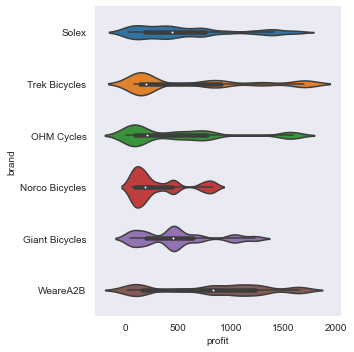

In [481]:
sns.catplot(y= 'brand', x= 'profit', kind= "violin", data= Transactions)

<AxesSubplot:xlabel='product_line', ylabel='profit'>

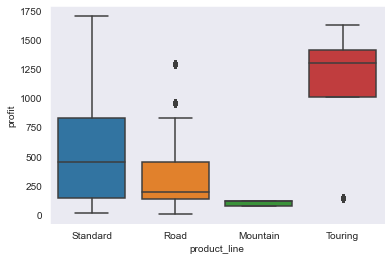

In [482]:
sns.boxplot(x= 'product_line', y= 'profit', data= Transactions)

<AxesSubplot:xlabel='product_size', ylabel='profit'>

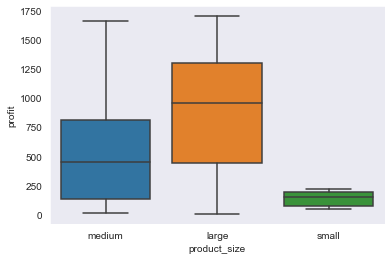

In [547]:
sns.boxplot(x= 'product_size', y= 'profit', data= Transactions)

<AxesSubplot:xlabel='product_class', ylabel='profit'>

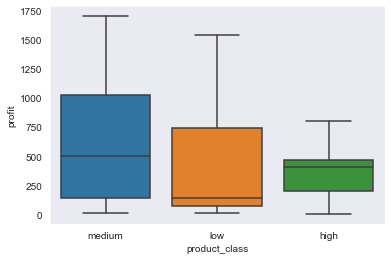

In [484]:
sns.boxplot(x= 'product_class', y= 'profit', data= Transactions)

### Market Basket Analysis

In [485]:
Transactions['product_sum']= Transactions['brand']+ ' '+ Transactions['product_line']+ ' '+ Transactions['product_class']+ ' '+ Transactions['product_size']+ ' '+ Transactions['profit'].apply(lambda x: np.str(x))#+ ' ' +Transactions['product_first_sold_date'].apply(lambda x: np.str(x))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. D

In [486]:
t= Transactions.loc[Transactions['order_status']== 'Cancelled'] 
status= t['product_sum'].value_counts().to_frame()
status2= Transactions['product_sum'].value_counts().to_frame()
#status.loc[status['product_sum']!= 0 ]
m= pd.merge(status, status2, 'left', left_on= status.index, right_on= status2.index)
m['cancelled_prop']= m['product_sum_x']/m['product_sum_y']
m.sort_values(by= 'cancelled_prop').tail(7)
# Transactions.groupby('order_status').agg({'product_sum': 'count',
#                                                     })

key_0  product_sum_x  \
5  OHM Cycles Standard high medium 583.2700000000001              4   
6       Solex Standard high medium 409.8600000000001              4   
3    OHM Cycles Road medium medium 75.13999999999999              4   
2  Trek Bicycles Standard high medium 198.2900000...              4   
7     Solex Standard medium medium 574.6200000000001              4   
4           OHM Cycles Standard medium medium 110.56              4   
0  Norco Bicycles Standard medium medium 737.5699...              6   

   product_sum_y  cancelled_prop  
5            198        0.020202  
6            190        0.021053  
3            190        0.021053  
2            184        0.021739  
7            183        0.021858  
4            178        0.022472  
0            204        0.029412

In [488]:
# Transactions['product_sum'].apply(str)
product_df= Transactions.groupby('customer_id').agg({'product_sum': lambda x: list(x[x.notna()]),
                                                     'profit': 'sum'
                                                    })
product_df= product_df.sort_values(by= 'profit').tail(350)
product_arr= np.array(product_df['product_sum'].tolist())
print(product_df)

                                                   product_sum       profit
customer_id                                                                
1            [OHM Cycles Standard medium medium 110.56, Sol...  3018.090000
2            [Giant Bicycles Standard medium medium 448.679...  2226.260000
3            [Giant Bicycles Standard medium small 144.26, ...  3362.810000
4            [Giant Bicycles Standard medium large 41.12999...   220.570000
5            [Norco Bicycles Road high large 309.8099999999...  2394.940000
...                                                        ...          ...
3497         [Giant Bicycles Standard medium medium 448.679...  1648.320000
3498         [WeareA2B Standard medium small 43.97, Solex S...  3147.330000
3499         [Giant Bicycles Standard medium medium 431.330...  4955.250000
3500         [Solex Standard medium medium 17.8699999999999...  1785.860000
5034         [Solex Road medium medium 104.24498410000001, ...   269.484972

[3494 rows 

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [37]:
import mlxtend.frequent_patterns 
import mlxtend.preprocessing
from mlxtend.frequent_patterns import apriori

encode= mlxtend.preprocessing.TransactionEncoder()

basket= encode.fit_transform(product_arr)
basket= pd.DataFrame(basket, columns= encode.columns_)
from mlxtend.frequent_patterns import association_rules

In [38]:
frequent_itemsets = apriori(basket, min_support= 0.01, use_colnames=True)
frequent_itemsets

support                                           itemsets
0     0.060000  (Giant Bicycles Road low small 64.92999999999995)
1     0.065714  (Giant Bicycles Road medium medium 198.2200000...
2     0.077143         (Giant Bicycles Road medium medium 709.34)
3     0.074286  (Giant Bicycles Standard high medium 451.65000...
4     0.071429        (Giant Bicycles Standard high medium 471.6)
...        ...                                                ...
1144  0.011429  (Solex Standard medium medium 751.02, Solex St...
1145  0.011429  (Trek Bicycles Standard medium large 1702.5499...
1146  0.011429  (WeareA2B Standard medium medium 834.939999999...
1147  0.011429  (Trek Bicycles Standard medium large 1702.5499...
1148  0.014286  (WeareA2B Standard medium medium 834.939999999...

[1149 rows x 2 columns]

In [39]:

rules = association_rules(frequent_itemsets, metric= "conviction", min_threshold= 2)
rules

antecedents  \
0   (Giant Bicycles Standard high medium 471.6, Gi...   
1   (WeareA2B Standard medium medium 1230.30000000...   
2   (Giant Bicycles Standard medium large 1230.27,...   
3   (Norco Bicycles Standard high medium 459.46000...   
4   (Solex Touring medium large 1408.91, Solex Sta...   
5   (Giant Bicycles Standard medium large 1055.82,...   
6   (WeareA2B Touring medium large 1630.25, Norco ...   
7   (Giant Bicycles Standard medium medium 448.679...   
8   (Solex Touring medium large 1408.91, Giant Bic...   
9   (Solex Touring medium large 1408.91, OHM Cycle...   
10  (Giant Bicycles Standard medium medium 57.7299...   
11  (Solex Road medium large 957.02, Giant Bicycle...   
12  (WeareA2B Standard medium medium 827.159999999...   
13  (Norco Bicycles Road high large 309.8099999999...   
14  (Norco Bicycles Road medium large 445.20999999...   
15  (Solex Standard low medium 1215.34, Norco Bicy...   
16  (Norco Bicycles Road medium medium 135.8499999...   
17  (Trek Bicycles Standard medium small 152.54999...   
18  (Trek Bicycles Standard medium small 152.54999...   
19  (Norco Bicycles Road medium medium 135.8499999...   
20  (OHM Cycles Standard medium medium 1592.19, No...   
21  (OHM Cycles Standard high medium 802.26, Norco...   
22  (Solex Road medium large 957.02, OHM Cycles St...   
23  (Solex Road medium large 957.02, Norco Bicycle...   
24  (OHM Cycles Standard high medium 802.26, Norco...   
25  (Norco Bicycles Standard medium medium 817.36,...   
26  (OHM Cycles Standard high medium 802.26, OHM C...   
27  (Solex Standard medium medium 502.47, Solex St...   
28  (WeareA2B Standard medium medium 547.28, Solex...   
29  (WeareA2B Standard medium medium 547.28, OHM C...   
30  (Solex Standard medium medium 502.47, WeareA2B...   
31  (Solex Road medium medium 104.24000000000001, ...   
32  (Solex Road medium medium 104.24000000000001, ...   
33  (WeareA2B Standard medium medium 1028.76, Sole...   
34  (Solex Standard medium medium 1612.25, OHM Cyc...   
35  (Solex Standard medium medium 1612.25, WeareA2...   
36  (Trek Bicycles Standard medium large 1702.5499...   
37  (Trek Bicycles Standard medium large 872.89000...   
38  (Solex Road medium medium 104.24000000000001, ...   
39  (Solex Standard medium medium 751.02, Solex St...   
40  (Solex Standard medium medium 751.02, Trek Bic...   
41  (Solex Standard high medium 299.27, Trek Bicyc...   
42  (Solex Standard medium medium 179.44, Solex St...   

                                          consequents  antecedent support  \
0   (Trek Bicycles Standard medium large 1702.5499...            0.011429   
1   (Trek Bicycles Standard medium large 1702.5499...            0.011429   
2      (Giant Bicycles Standard medium large 1055.82)            0.020000   
3                (Solex Touring medium large 1408.91)            0.022857   
4      (Giant Bicycles Standard medium large 1055.82)            0.017143   
5                (Solex Touring medium large 1408.91)            0.017143   
6   (Giant Bicycles Standard medium medium 448.679...            0.017143   
7             (WeareA2B Touring medium large 1630.25)            0.014286   
8   (OHM Cycles Standard high medium 583.270000000...            0.014286   
9   (Giant Bicycles Standard medium medium 57.7299...            0.017143   
10               (Solex Touring medium large 1408.91)            0.017143   
11  (Trek Bicycles Standard medium large 1702.5499...            0.011429   
12  (Trek Bicycles Standard medium large 1702.5499...            0.011429   
13  (Trek Bicycles Standard medium large 1702.5499...            0.014286   
14                (Solex Standard low medium 1215.34)            0.020000   
15  (OHM Cycles Standard low medium 1544.610000000...            0.017143   
16  (WeareA2B Standard medium medium 1279.39999999...            0.020000   
17  (WeareA2B Standard medium medium 1279.39999999...            0.011429   
18  (Norco Bicycles Road medium medium 135.8499999...            0.014

In [40]:
rules_con = association_rules(frequent_itemsets, metric= "confidence", min_threshold= 0.2)
rules_con

antecedents  \
0    (Giant Bicycles Road low small 64.92999999999995)   
1    (Norco Bicycles Road medium medium 135.8499999...   
2    (Giant Bicycles Road low small 64.92999999999995)   
3    (Giant Bicycles Road low small 64.92999999999995)   
4    (Giant Bicycles Road low small 64.92999999999995)   
..                                                 ...   
574  (Trek Bicycles Standard medium large 1702.5499...   
575  (Solex Touring medium large 1408.91, WeareA2B ...   
576  (WeareA2B Standard medium medium 834.939999999...   
577  (WeareA2B Standard medium medium 834.939999999...   
578  (Trek Bicycles Standard medium large 1702.5499...   

                                           consequents  antecedent support  \
0    (Norco Bicycles Road medium medium 135.8499999...            0.060000   
1    (Giant Bicycles Road low small 64.92999999999995)            0.062857   
2    (Norco Bicycles Standard high medium 459.46000...            0.060000   
3    (Norco Bicycles Standard medium medium 737.569...            0.060000   
4          (OHM Cycles Standard medium medium 1592.19)            0.060000   
..                                                 ...                 ...   
574               (Solex Touring medium large 1408.91)            0.034286   
575  (Trek Bicycles Standard medium large 1702.5499...            0.028571   
576               (Solex Touring medium large 1408.91)            0.034286   
577  (Trek Bicycles Standard medium large 1702.5499...            0.022857   
578  (WeareA2B Standard medium medium 834.939999999...            0.045714   

     consequent support   support  confidence      lift  leverage  conviction  
0              0.062857  0.014286    0.238095  3.787879  0.010514    1.230000  
1              0.060000  0.014286    0.227273  3.787879  0.010514    1.216471  
2              0.085714  0.014286    0.238095  2.777778  0.009143    1.200000  
3              0.114286  0.014286    0.238095  2.083333  0.007429    1.162500  
4              0.171429  0.017143    0.285714  1.666667  0.006857    1.160000  
..                  ...       ...         ...       ...       ...         ...  
574            0.171429  0.011429    0.333333  1.944444  0.005551    1.242857  
575            0.382857  0.011429    0.400000  1.044776  0.000490    1.028571  
576            0.171429  0.014286    0.416667  2.430556  0.008408    1.420408  
577            0.382857  0.014286    0.625000  1.632463  0.005535    1.645714  
578            0.088571  0.014286    0.312500  3.528226  0.010237    1.325714  

[579 rows x 9 columns]

In [41]:

rules['cnt_items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['cnt_items']>1].sort_values('lift', ascending=False).head()

antecedents  \
18  (Trek Bicycles Standard medium small 152.54999...   
19  (Norco Bicycles Road medium medium 135.8499999...   
9   (Solex Touring medium large 1408.91, OHM Cycle...   
8   (Solex Touring medium large 1408.91, Giant Bic...   
39  (Solex Standard medium medium 751.02, Solex St...   

                                          consequents  antecedent support  \
18  (Norco Bicycles Road medium medium 135.8499999...            0.014286   
19  (Trek Bicycles Standard medium small 152.54999...            0.020000   
9   (Giant Bicycles Standard medium medium 57.7299...            0.017143   
8   (OHM Cycles Standard high medium 583.270000000...            0.014286   
39  (Trek Bicycles Standard medium medium 110.8099...            0.014286   

    consequent support   support  confidence       lift  leverage  conviction  \
18            0.062857  0.011429    0.800000  12.727273  0.010531    4.685714   
19            0.048571  0.011429    0.571429  11.764706  0.010457    2.220000   
9             0.062857  0.011429    0.666667  10.606061  0.010351    2.811429   
8             0.080000  0.011429    0.800000  10.000000  0.010286    4.600000   
39            0.082857  0.011429    0.800000   9.655172  0.010245    4.585714   

    cnt_items  
18          2  
19          2  
9           2  
8           2  
39          2

In [43]:
data = Transactions[[ 'brand', 'product_line', 'product_class', 'product_size', 'list_price', 'standard_cost']]

data.dropna(axis= 0, inplace= True)
data= pd.get_dummies(data, columns= ['brand', 'product_line'])
print(data.columns)
class_code= {'low': 0,'medium': 1, 'high': 2}
size_code= {'small':0, 'medium': 1, 'large': 2}

data['product_class']= data.product_class.map(class_code)
data['product_size']= data.product_size.map(size_code)

# rbs= RobustScaler().fit(data)
# data= rbs.transform(data)

Index(['product_class', 'product_size', 'list_price', 'standard_cost',
       'brand_Giant Bicycles', 'brand_Norco Bicycles', 'brand_OHM Cycles',
       'brand_Solex', 'brand_Trek Bicycles', 'brand_WeareA2B',
       'product_line_Mountain', 'product_line_Road', 'product_line_Standard',
       'product_line_Touring'],
      dtype='object')


### Customer Exploration

In [27]:
CustomerDemo.head(10)

customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   
5            6            Curr  Duckhouse    Male   
6            7            Fina     Merali  Female   
7            8             Rod      Inder    Male   
8            9            Mala       Lind  Female   
9           10        Fiorenze    Birdall  Female   

   past_3_years_bike_related_purchases        DOB  \
0                                   93 1953-10-12   
1                                   81 1980-12-16   
2                                   61 1954-01-20   
3                                   33 1961-10-03   
4                                   56 1977-05-13   
5                                   35 1966-09-16   
6                                    6 1976-02-23   
7                                   31 1962-03-30   
8                                   97 1973-03-10   
9                                   49 1988-10-11   

                              job_title job_industry_category  \
0                   Executive Secretary                Health   
1                Administrative Officer    Financial Services   
2                    Recruiting Manager              Property   
3                                   NaN                    IT   
4                         Senior Editor                   NaN   
5                                   NaN                Retail   
6                                   NaN    Financial Services   
7                       Media Manager I                   NaN   
8  Business Systems Development Analyst           Argiculture   
9               Senior Quality Engineer    Financial Services   

      wealth_segment deceased_indicator  \
0      Mass Customer                  N   
1      Mass Customer                  N   
2      Mass Customer                  N   
3      Mass Customer                  N   
4  Affluent Customer                  N   
5     High Net Worth                  N   
6  Affluent Customer                  N   
7      Mass Customer                  N   
8  Affluent Customer                  N   
9      Mass Customer                  N   

                                             default owns_car  tenure  
0                                                 "'      Yes    11.0  
1                       <script>alert('hi')</script>      Yes    16.0  
2                                2018-02-01 00:00:00      Yes    15.0  
3  () { _; } >_[$($())] { touch /tmp/blns.shellsh...       No     7.0  
4                                                NIL      Yes     8.0  
5                                           ðµ ð ð ð      Yes    13.0  
6                                          â°â´âµâââ      Yes    11.0  
7                            (â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»)       No     7.0  
8                                                0/0      Yes     8.0  
9                                               ð©ð½      Yes    20.0

In [28]:
CustomerDemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [29]:
CustomerDemo.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

In [30]:
CustomerDemo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

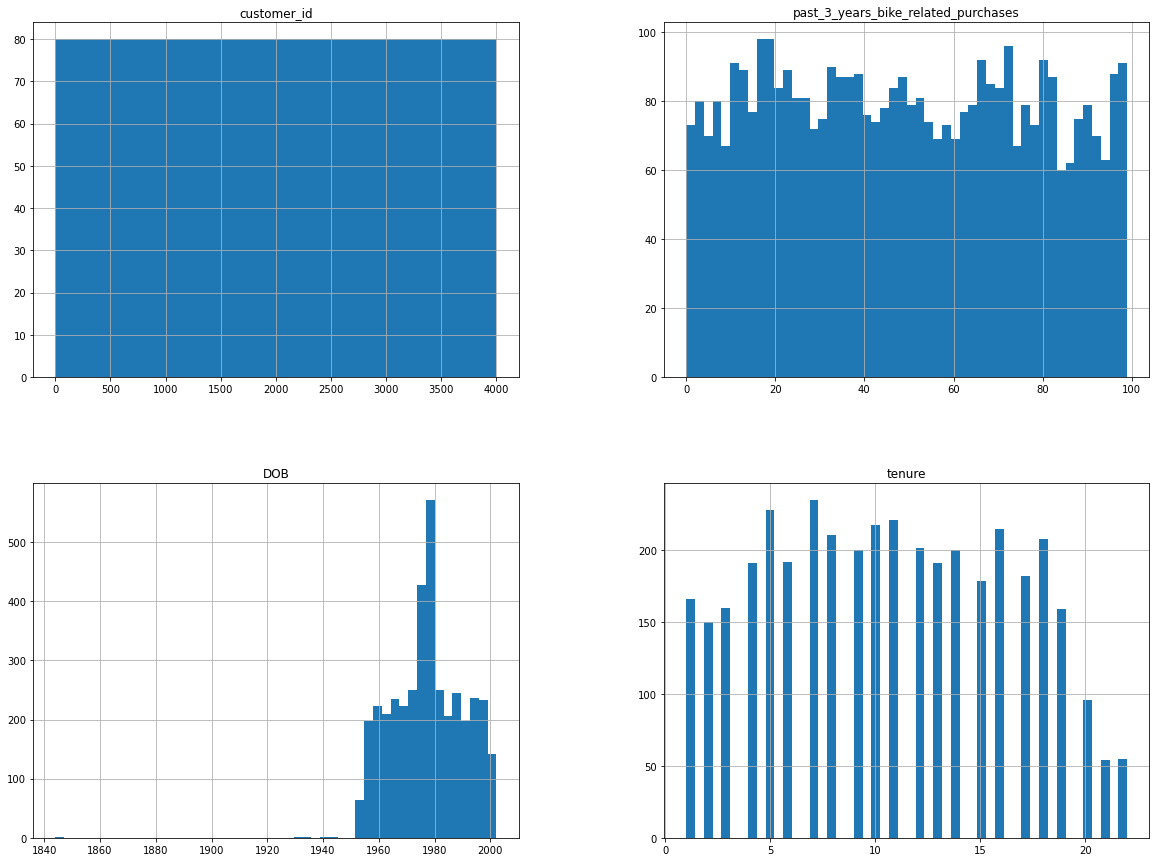

In [31]:
%matplotlib inline   
import matplotlib.pyplot as plt
CustomerDemo.hist(bins=50,figsize=(20,15))
plt.show()

In [32]:
CustomerDemo.loc[CustomerDemo['DOB'].dt.year.min()]

customer_id                                                                         1844
first_name                                                                       Amaleta
last_name                                                                       Slafford
gender                                                                            Female
past_3_years_bike_related_purchases                                                   71
DOB                                                                  1975-10-21 00:00:00
job_title                                                               Product Engineer
job_industry_category                                                                NaN
wealth_segment                                                             Mass Customer
deceased_indicator                                                                     N
default                                Ø«Ù ÙÙØ³ Ø³ÙØ·Øª ÙØ¨Ø§ÙØªØ­Ø¯ÙØ¯Ø, Ø¬Ø²ÙØ±ØªÙ ...
owns_car             

In [33]:
CustomerDemo= CustomerDemo[CustomerDemo['DOB'].dt.year != 1843]

<AxesSubplot:>

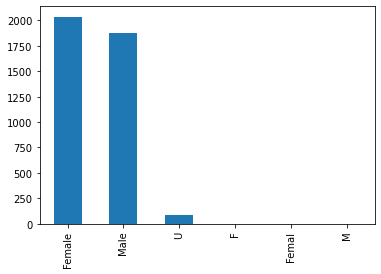

In [44]:
CustomerDemo['gender'].value_counts().plot(kind= 'bar')

In [45]:
CustomerDemo['gender']= CustomerDemo['gender'].replace(to_replace= ['Female', 'Femal'], value= 'F')
CustomerDemo['gender']= CustomerDemo['gender'].replace(to_replace= 'Male', value= 'M')

<AxesSubplot:ylabel='wealth_segment'>

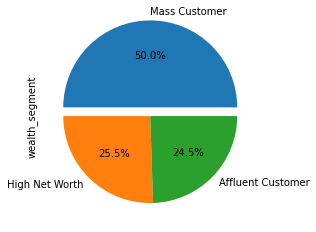

In [46]:
CustomerDemo['wealth_segment' ].value_counts().plot(kind= 'pie', autopct='%1.1f%%', explode=(0.1, 0, 0))

<AxesSubplot:ylabel='job_industry_category'>

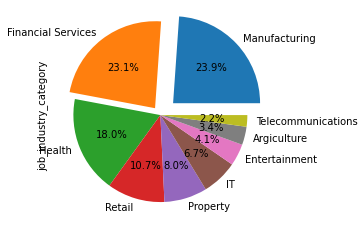

In [48]:
CustomerDemo['job_industry_category'].value_counts().plot(kind= 'pie', autopct='%1.1f%%', explode=(0.2, 0.1, 0, 0, 0, 0, 0, 0, 0))

In [985]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df= x, res_var='result', anova_model= 'result ~ C(gender)+ C(wealth_segment)+ C(owns_car)+ C(state)+ C(job_title)+ C(job_industry_category)+ DOB+ property_valuation+ tenure+ past_3_years_bike_related_purchases')
res.anova_summary

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)


df        sum_sq       mean_sq  \
C(gender)                               2.0  4.720517e+06  2.360258e+06   
C(wealth_segment)                       2.0  2.720188e+06  1.360094e+06   
C(owns_car)                             1.0  2.470218e+05  2.470218e+05   
C(state)                                2.0  5.507317e+06  2.753658e+06   
C(job_title)                          194.0  9.386068e+08  4.838179e+06   
C(job_industry_category)                8.0  1.285375e+07  1.606719e+06   
DOB                                     1.0  6.253399e+05  6.253399e+05   
property_valuation                      1.0  2.436681e+05  2.436681e+05   
tenure                                  1.0  7.516829e+06  7.516829e+06   
past_3_years_bike_related_purchases     1.0  2.386995e+06  2.386995e+06   
Residual                             2315.0  7.185507e+09  3.103891e+06   

                                            F    PR(>F)  
C(gender)                            0.760419  0.383288  
C(wealth_segment)                    0.438190  0.645257  
C(owns_car)                          0.079585  0.777886  
C(state)                             0.887163  0.411962  
C(job_title)                         1.558747  0.000003  
C(job_industry_category)             0.517647  0.844012  
DOB                                  0.201470  0.653579  
property_valuation                   0.078504  0.779360  
tenure                               2.421744  0.119798  
past_3_years_bike_related_purchases  0.769033  0.380607  
Residual                                  NaN       NaN

In [1010]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df= x, res_var='result', xfac_var='job_title', anova_model='result ~ C(job_title)')
res.tukey_summary

group1                                group2  \
0           Executive Secretary                Administrative Officer   
1           Executive Secretary  Business Systems Development Analyst   
2           Executive Secretary                Nuclear Power Engineer   
3           Executive Secretary                           Developer I   
4           Executive Secretary                     Account Executive   
...                         ...                                   ...   
18910     Programmer Analyst IV              Systems Administrator IV   
18911     Programmer Analyst IV                Research Assistant III   
18912      Programmer Analyst I              Systems Administrator IV   
18913      Programmer Analyst I                Research Assistant III   
18914  Systems Administrator IV                Research Assistant III   

           Diff     Lower     Upper   q-value  p-value  
0      0.027143 -0.348365  0.402651  0.470042      0.9  
1      0.008571 -0.366937  0.384079  0.148434      0.9  
2      0.045000 -0.319269  0.409269  0.803323      0.9  
3      0.080000 -1.311704  1.471704  0.373804      0.9  
4      0.003333 -0.386656  0.393323  0.055581      0.9  
...         ...       ...       ...       ...      ...  
18910  0.500000 -0.745775  1.745775  2.609942      0.9  
18911  0.500000 -0.864678  1.864678  2.382540      0.9  
18912  0.000000 -1.042290  1.042290  0.000000      0.9  
18913  0.000000 -1.181846  1.181846  0.000000      0.9  
18914  0.000000 -1.245775  1.245775  0.000000      0.9  

[18915 rows x 7 columns]

In [1099]:
h= res.tukey_summary.sort_values(by= 'p-value').head(15)
sig_job= h['group1']
sig_job

9334              Marketing Manager
9046               Product Engineer
9339              Marketing Manager
9372              Marketing Manager
5735                       VP Sales
9349              Marketing Manager
3387    Information Systems Manager
4748       Senior Financial Analyst
9371              Marketing Manager
3374    Information Systems Manager
9398              Marketing Manager
3392    Information Systems Manager
9342              Marketing Manager
9332              Marketing Manager
3425    Information Systems Manager
Name: group1, dtype: object

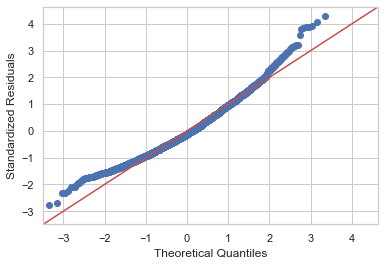

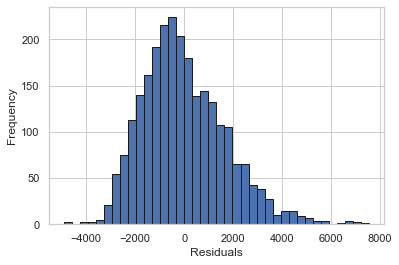

0.9754606485366821 1.9122966580566898e-20


In [979]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

In [38]:
CustomerDemo.groupby('wealth_segment').agg({'past_3_years_bike_related_purchases': 'sum'}).sort_values("past_3_years_bike_related_purchases", ascending = False)

past_3_years_bike_related_purchases
wealth_segment                                        
Mass Customer                                    99457
High Net Worth                                   48281
Affluent Customer                                47763

(<Figure size 432x288 with 3 Axes>,
 {('Yes', 'F'): (0.0, 0.0, 0.5036084891869734, 0.5040507290003402),
  ('Yes', 'M'): (0.0,
   0.5073619872784859,
   0.5036084891869734,
   0.464786796848415),
  ('Yes', 'U'): (0.0,
   0.9754600424050467,
   0.5036084891869734,
   0.02453995759495324),
  ('No', 'F'): (0.5085836135650829,
   0.0,
   0.49141638643491725,
   0.509011652275966),
  ('No', 'M'): (0.5085836135650829,
   0.5123229105541117,
   0.49141638643491725,
   0.46575572135132864),
  ('No', 'U'): (0.5085836135650829,
   0.9813898901835861,
   0.49141638643491725,
   0.01861010981641379)})

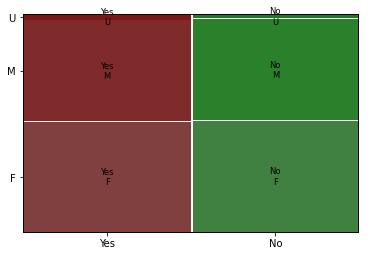

In [39]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(CustomerDemo, ['owns_car', 'gender'])# 'job_industry_category'])

<AxesSubplot:xlabel='wealth_segment', ylabel='tenure'>

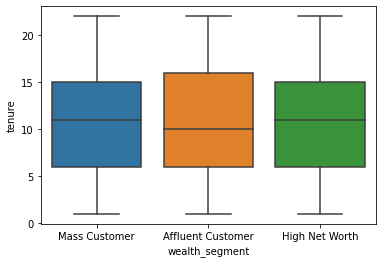

In [40]:
sns.boxplot(x= 'wealth_segment', y= 'tenure', data= CustomerDemo)

In [41]:
CustomerAddress

customer_id                    address  postcode            state  \
0               1         060 Morning Avenue      2016  New South Wales   
1               2        6 Meadow Vale Court      2153  New South Wales   
2               4         0 Holy Cross Court      4211              QLD   
3               5        17979 Del Mar Point      2448  New South Wales   
4               6           9 Oakridge Court      3216              VIC   
...           ...                        ...       ...              ...   
3994         3999            1482 Hauk Trail      3064              VIC   
3995         4000  57042 Village Green Point      4511              QLD   
3996         4001     87 Crescent Oaks Alley      2756              NSW   
3997         4002           8194 Lien Street      4032              QLD   
3998         4003            320 Acker Drive      2251              NSW   

        country  property_valuation  
0     Australia                  10  
1     Australia                  10  
2     Australia                   9  
3     Australia                   4  
4     Australia                   9  
...         ...                 ...  
3994  Australia                   3  
3995  Australia                   6  
3996  Australia                  10  
3997  Australia                   7  
3998  Australia                   7  

[3999 rows x 6 columns]

In [42]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [43]:
CustomerAddress.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [44]:
CustomerAddress.nunique(axis= 0)

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

<AxesSubplot:>

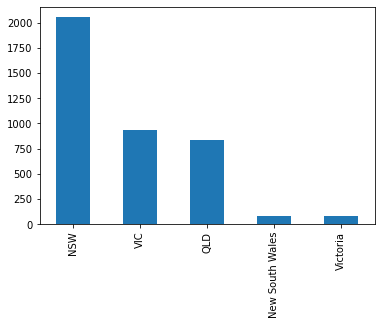

In [45]:
CustomerAddress['state'].value_counts().plot(kind= 'bar')

In [46]:
CustomerAddress['state']= CustomerAddress['state'].replace(to_replace= 'New South Wales', value= 'NSW')
CustomerAddress['state']= CustomerAddress['state'].replace(to_replace= 'Victoria', value= 'VIC')

In [47]:
CustomerAddress['property_valuation'].describe()

count    3999.000000
mean        7.514379
std         2.824663
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        12.000000
Name: property_valuation, dtype: float64

In [858]:
Customer= pd.merge(CustomerDemo, CustomerAddress, left_on='customer_id', right_on='customer_id', how= 'inner')
Customer

customer_id      first_name  last_name  gender  \
0               1         Laraine  Medendorp       F   
1               2             Eli    Bockman    Male   
2               4          Talbot        NaN    Male   
3               5  Sheila-kathryn     Calton  Female   
4               6            Curr  Duckhouse    Male   
...           ...             ...        ...     ...   
3991         3996         Rosalia   Halgarth  Female   
3992         3997          Blanch     Nisuis  Female   
3993         3998          Sarene    Woolley       U   
3994         3999       Patrizius        NaN    Male   
3995         4000           Kippy    Oldland    Male   

      past_3_years_bike_related_purchases        DOB               job_title  \
0                                      93 1953-10-12     Executive Secretary   
1                                      81 1980-12-16  Administrative Officer   
2                                      33 1961-10-03                     NaN   
3                                      56 1977-05-13           Senior Editor   
4                                      35 1966-09-16                     NaN   
...                                   ...        ...                     ...   
3991                                    8 1975-08-09   VP Product Management   
3992                                   87 2001-07-13         Statistician II   
3993                                   60        NaT       Assistant Manager   
3994                                   11 1973-10-24                     NaN   
3995                                   76 1991-11-05    Software Engineer IV   

     job_industry_category     wealth_segment deceased_indicator  \
0                   Health      Mass Customer                  N   
1       Financial Services      Mass Customer                  N   
2                       IT      Mass Customer                  N   
3                      NaN  Affluent Customer                  N   
4                   Retail     High Net Worth                  N   
...                    ...                ...                ...   
3991                Health      Mass Customer                  N   
3992         Manufacturing     High Net Worth                  N   
3993                    IT     High Net Worth                  N   
3994         Manufacturing  Affluent Customer                  N   
3995                   NaN  Affluent Customer                  N   

                                                default owns_car  tenure  \
0                                                    "'      Yes    11.0   
1                          <script>alert('hi')</script>      Yes    16.0   
2     () { _; } >_[$($())] { touch /tmp/blns.shellsh...       No     7.0   
3                                                   NIL      Yes     8.0   
4                                              ðµ ð ð ð      Yes    13.0   
...                                                 ...      ...     ...   
3991                                               -100       No    19.0   
3992                                           â¦testâ§      Yes     1.0   
3993                                                NaN       No     NaN   
3994                             Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ       Yes    10.0   
3995                                                0/0       No    11.0   

                        address  postcode            state    country  \
0            060 Morning Avenue      2016  New South Wales  Australia   
1           6 Meadow Vale Court      2153  New South Wales  Australia   
2            0 Holy Cross Court      4211              QLD  Australia   
3           17979 Del Mar Point      2448  New South Wales  Australia   
4              9 Oakridge Court      3216              VIC  Australia   
...                         ...       ...              ...        ...   
3991         0 Transport Center      3977              VIC  Australia   
3992        4 Dovetail Crossing      2350              NSW

In [859]:
Customer= Customer[Customer['customer_id']<=3500]
Customer= Customer[Customer['DOB'].dt.year != 1843]
#Customer= Customer[Customer['deceased_indicator'] == 'N']
Customer['gender']= Customer['gender'].replace(to_replace= ['Female', 'Femal'], value= 'F')
Customer['gender']= Customer['gender'].replace(to_replace= ['Male'], value= 'M')
Customer['state']= Customer['state'].replace(to_replace= 'New South Wales', value= 'NSW')
Customer['state']= Customer['state'].replace(to_replace= 'Victoria', value= 'VIC')

In [860]:
Transactions[Transactions['customer_id'].isin([750, 3790])]

transaction_id  product_id  customer_id transaction_date  online_order  \
441               442          63          750       2017-04-24           1.0   
3828             3829          52          750       2017-11-02           0.0   
5287             5288          49          750       2017-10-12           1.0   
8953             8954           6          750       2017-07-27           0.0   
9777             9778           3          750       2017-01-30           1.0   
11367           11368          57          750       2017-09-03           0.0   

      order_status          brand product_line product_class product_size  \
441       Approved          Solex     Standard        medium       medium   
3828      Approved     OHM Cycles         Road        medium       medium   
5287      Approved  Trek Bicycles         Road        medium       medium   
8953      Approved     OHM Cycles     Standard          high       medium   
9777      Approved  Trek Bicycles     Standard        medium        large   
11367     Approved       WeareA2B      Touring        medium        large   

       list_price  standard_cost product_first_sold_date   profit  \
441       1483.20          99.59              2005-10-22  1383.61   
3828      1280.28         829.51              1997-02-09   450.77   
5287       533.51         400.13              2001-11-25   133.38   
8953       227.88         136.73              2007-08-04    91.15   
9777      2091.47         388.92              2005-08-09  1702.55   
11367     1890.39         260.14              2015-10-18  1630.25   

                                             product_sum  
441      Solex Standard medium medium 1383.6100000000001  
3828                OHM Cycles Road medium medium 450.77  
5287             Trek Bicycles Road medium medium 133.38  
8953               OHM Cycles Standard high medium 91.15  
9777   Trek Bicycles Standard medium large 1702.54999...  
11367              WeareA2B Touring medium large 1630.25

In [861]:
Customer.head(5)

customer_id      first_name  last_name gender  \
0            1         Laraine  Medendorp      F   
1            2             Eli    Bockman      M   
2            4          Talbot        NaN      M   
3            5  Sheila-kathryn     Calton      F   
4            6            Curr  Duckhouse      M   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   
2                                   33 1961-10-03                     NaN   
3                                   56 1977-05-13           Senior Editor   
4                                   35 1966-09-16                     NaN   

  job_industry_category     wealth_segment deceased_indicator  \
0                Health      Mass Customer                  N   
1    Financial Services      Mass Customer                  N   
2                    IT      Mass Customer                  N   
3                   NaN  Affluent Customer                  N   
4                Retail     High Net Worth                  N   

                                             default owns_car  tenure  \
0                                                 "'      Yes    11.0   
1                       <script>alert('hi')</script>      Yes    16.0   
2  () { _; } >_[$($())] { touch /tmp/blns.shellsh...       No     7.0   
3                                                NIL      Yes     8.0   
4                                           ðµ ð ð ð      Yes    13.0   

               address  postcode state    country  property_valuation  
0   060 Morning Avenue      2016   NSW  Australia                  10  
1  6 Meadow Vale Court      2153   NSW  Australia                  10  
2   0 Holy Cross Court      4211   QLD  Australia                   9  
3  17979 Del Mar Point      2448   NSW  Australia                   4  
4     9 Oakridge Court      3216   VIC  Australia                   9

In [862]:
#Create the total profit and revenue columns
df= pd.merge(Transactions, Customer, left_on= "customer_id", right_on= 'customer_id', how= "right")


df.loc[df['order_status']== 'Cancelled', 'total_revenue']= 0
df.loc[df['order_status']== 'Cancelled', 'total_profit']= 0

Profit= df.groupby('customer_id').agg({'profit': 'sum'})
Revenue= df.groupby('customer_id').agg({'list_price': 'sum'})

Customer.loc[:, 'profit']= np.array(Profit)
Customer.loc[:, 'revenue']= np.array(Revenue)


#Add frequency and recency columns

freq= df.groupby('customer_id').agg({'customer_id': 'count'})
rec= df.groupby('customer_id').agg({'transaction_date': 'max'})
first= df.groupby('customer_id').agg({'transaction_date': 'min'})

Customer.loc[:, 'frequency']= np.array(freq)
Customer.loc[:, 'recency']= np.array(rec)
Customer.loc[:, 'period']= np.array(rec)- np.array(first)

#Since we will use k means, recency will be calculated as the number of days from the start of the year to the last purchase
Customer['recency']= Customer['recency']- Customer['recency'].min()
Customer['recency']= Customer['recency'].dt.days

#Customer['first_purchase']= Customer['first_purchase'].max()- Customer['first_purchase'] 
Customer['period']= Customer['period'].dt.days

Customer.loc[Customer['frequency'].isnull(), 'frequency']= 0
Customer.loc[Customer['recency'].isnull(), 'recency' ]= -1
Customer.loc[Customer['period'].isnull(), 'period' ]= -1




Customer[Customer['profit']==0]


customer_id first_name  last_name gender  \
847           852      Andie     Bonney      F   
864           869      Addia      Abels      F   
1368         1373   Shaylynn     Epsley      F   
2069         2074     Roslyn    Rawdall      F   
2655         2660       Hunt   Scollard      M   
3224         3229     Carrol  Gheorghie      M   
3231         3236      Edsel    Arguile      M   

      past_3_years_bike_related_purchases        DOB  \
847                                    37 2000-11-04   
864                                     7 1984-03-11   
1368                                    3 1958-09-23   
2069                                   90 1997-06-11   
2655                                   44 1963-11-15   
3224                                   69 1964-10-18   
3231                                   37 1993-04-01   

                     job_title job_industry_category     wealth_segment  \
847       Compensation Analyst    Financial Services  Affluent Customer   
864   Account Representative I    Financial Services     High Net Worth   
1368         Director of Sales    Financial Services      Mass Customer   
2069                       NaN    Financial Services      Mass Customer   
2655                       NaN                Retail     High Net Worth   
3224      Sales Representative                Retail     High Net Worth   
3231                       NaN         Manufacturing      Mass Customer   

     deceased_indicator                                            default  \
847                   N                                         !@#$%^&*()   
864                   N                                         __ï¾(,_,*)   
1368                  N  ËÉnbá´lÉ ÉuÆÉÉ¯ ÇÉ¹olop ÊÇ ÇÉ¹oqÉl Ên Êunpá´pá...   
2069                  N                                                100   
2655                  N                                                NaN   
3224                  N                                         __ï¾(,_,*)   
3231                  N                                  Î©âÃ§ââ«ËÂµâ¤â¥Ã·   

     owns_car  tenure             address  postcode state    country  \
847       Yes     2.0    641 Waywood Lane      2336   NSW  Australia   
864       Yes    10.0  6712 Nova Crossing      2065   NSW  Australia   
1368      Yes    12.0   939 Hermina Drive      3198   VIC  Australia   
2069       No     4.0    0442 Debra Point      2281   NSW  Australia   
2655      Yes    19.0  68128 Leroy Street      4213   QLD  Australia   
3224      Yes     6.0    2 Del Sol Circle      3012   VIC  Australia   
3231      Yes     5.0         1 Roth Pass      3199   VIC  Australia   

      property_valuation  profit  revenue  frequency  recency  period  
847                    7     0.0      0.0          1     -1.0    -1.0  
864                   10     0.0      0.0          1     -1.0    -1.0  
1368                   8     0.0      0.0          1     -1.0    -1.0  
2069                   7     0.0      0.0          1     -1.0    -1.0  
2655                   8     0.0      0.0          1     -1.0    -1.0  
3224                   1     0.0      0.0          1     -1.0    -1.0  
3231                   4     0.0      0.0          1     -1.0    -1.0

In [856]:
df= df[df['order_status']== 'Approved']
Metrics= df.groupby('customer_id').agg({'transaction_date': 'max',
                                    'customer_id': 'count',
                                    'profit': 'sum', 
                                    'list_price': 'sum',
                                    'past_3_years_bike_related_purchases': 'max'
                                   }
                                  )
Metrics.rename(columns= {
                        'transaction_date': 'recency',
                        'customer_id': 'frequency',
                        'profit': 'profit',
                        'list_price': 'revenue',
                        'past_3_years_bike_related_purchases': 'frequency_3'
                    },
          inplace= True
          )

Metrics['recency']= Metrics['recency'].max()-Metrics['recency']
Metrics['recency']= Metrics['recency'].dt.days
Metrics.loc[Metrics['recency'].isnull(), 'frequency']= 0
Metrics.loc[Metrics['recency'].isnull(), 'recency' ]= 730

active_period= df.groupby('customer_id').agg({'transaction_date': [lambda x: x.max()-x.min()]})
Metrics['active_period']= active_period
Metrics['active_period']= Metrics['active_period'].dt.days
def Month(x):
    if x<31:
        return 1
    else:
        return x/31
Metrics['active_month']= Metrics['active_period'].apply(lambda x: Month(x))
Metrics['revenue_month']= Metrics['revenue']/(Metrics['active_month'])
Metrics['profit_month']= Metrics['profit']/(Metrics['active_month'])

Metrics['first_trans']= df.groupby('customer_id').agg({'transaction_date': 'min'})
Metrics['first_trans']= Metrics['first_trans'].dt.month

Metrics['last_trans']= df.groupby('customer_id').agg({'transaction_date': 'max'})
Metrics['last_trans']= Metrics['last_trans'].dt.month
Metrics


recency  frequency   profit  revenue  frequency_3  active_period  \
customer_id                                                                     
1                  7         11  3018.09  9084.45           93            352   
2                128          3  2226.26  4149.07           81            112   
4                195          2   220.57  1047.72           33             76   
5                 16          6  2394.94  5903.20           56            286   
6                 64          5  3946.55  5931.69           35            272   
...              ...        ...      ...      ...          ...            ...   
3496             256          4  2045.84  4725.38           99             42   
3497              52          3  1648.32  3744.07           73             68   
3498             127          6  3147.33  5177.06           28            203   
3499              51          7  4955.25  7673.48           29            301   
3500             144          6  1785.86  4922.41           71            211   

             active_month  revenue_month  profit_month  first_trans  \
customer_id                                                           
1               11.354839     800.050994    265.797699            1   
2                3.612903    1148.403304    616.196964            5   
4                2.451613     427.359474     89.969342            4   
5                9.225806     639.857343    259.591399            3   
6                8.774194     676.038199    449.790625            1   
...                   ...            ...           ...          ...   
3496             1.354839    3487.780476   1510.024762            3   
3497             2.193548    1706.855441    751.440000            9   
3498             6.548387     790.585517    480.626749            2   
3499             9.709677     790.291960    510.341362            1   
3500             6.806452     723.197678    262.377536            1   

             last_trans  
customer_id              
1                    12  
2                     8  
4                     6  
5                    12  
6                    10  
...                 ...  
3496                  4  
3497                 11  
3498                  8  
3499                 11  
3500                  8  

[3487 rows x 11 columns]

In [56]:
df= df[df['order_status']== 'Cancelled']
Metrics= df.groupby('customer_id').agg({'transaction_date': 'max',
                                    'customer_id': 'count',
                                    'profit': 'sum', 
                                    'list_price': 'sum',
                                    'past_3_years_bike_related_purchases': 'max'
                                   }
                                  )
Metrics.rename(columns= {
                        'transaction_date': 'recency',
                        'customer_id': 'frequency',
                        'profit': 'profit',
                        'list_price': 'revenue',
                        'past_3_years_bike_related_purchases': 'frequency_3'
                    },
          inplace= True
          )

Metrics['recency']= Metrics['recency'].max()-Metrics['recency']
Metrics['recency']= Metrics['recency'].dt.days
Metrics.loc[Metrics['frequency'].isnull(), 'frequency']= 0
Metrics.loc[Metrics['recency'].isnull(), 'recency' ]= 730

active_period= df.groupby('customer_id').agg({'transaction_date': [lambda x: x.max()-x.min()]})
Metrics['active_period']= active_period
Metrics['active_period']= Metrics['active_period'].dt.day
# def Month(x):
#     if x<31:
#         return 1
#     else:
#         return x/31
# Metrics['active_month']= Metrics['active_period'].apply(lambda x: Month(x))
# Metrics['revenue_month']= Metrics['revenue']/(Metrics['active_month'])
# Metrics['profit_month']= Metrics['profit']/(Metrics['active_month'])

# Metrics['first_trans']= df.groupby('customer_id').agg({'transaction_date': 'min'})
# Metrics['first_trans']= Metrics['first_trans'].dt.month

# Metrics['last_trans']= df.groupby('customer_id').agg({'transaction_date': 'max'})
# Metrics['last_trans']= Metrics['last_trans'].dt.month
# Metrics.sort_values(by= 'frequency')


In [67]:
col= ['active_period', 'active_month', 'revenue_month', 'profit_month']
#Metrics.loc[Metrics['revenue_month'].isnull()]
def Missing(x):
    Metrics.loc[Metrics[x].isnull()]= Metrics.loc[Metrics[x].isnull()].fillna(0)
Missing('active_period')
Missing('active_month')
Missing('revenue_month')
Missing('profit_month')
Metrics.loc[Metrics['revenue_month'].isnull()]


Empty DataFrame
Columns: [recency, frequency, profit, revenue, frequency_3, active_period, active_month, revenue_month, profit_month, first_trans, last_trans]
Index: []

In [54]:
Metrics['profit_value']= round(Metrics['profit'].rank(pct= True, ascending= True), 3)
Metrics['profit_rank']= Metrics['profit_value'].rank(method= 'min', ascending= False)

Metrics['rev_value']= round(Metrics['revenue'].rank(pct= True, ascending= True), 3)
Metrics['rev_rank']= Metrics['rev_value'].rank(method= 'min', ascending= False)

Metrics['decile_rank']= pd.qcut(Metrics['profit'],
                           q = 10, labels = False)
#Metrics= Metrics.loc[Metrics['profit_value']>=0.75]
Metrics

recency  frequency   profit  revenue  frequency_3  active_period  \
customer_id                                                                     
1                7.0         11  3018.09  9084.45           93          352.0   
2              128.0          3  2226.26  4149.07           81          112.0   
4              195.0          2   220.57  1047.72           33           76.0   
5               16.0          6  2394.94  5903.20           56          286.0   
6               64.0          5  3946.55  5931.69           35          272.0   
...              ...        ...      ...      ...          ...            ...   
3496           256.0          4  2045.84  4725.38           99           42.0   
3497            52.0          3  1648.32  3744.07           73           68.0   
3498           127.0          6  3147.33  5177.06           28          203.0   
3499            51.0          7  4955.25  7673.48           29          301.0   
3500           144.0          6  1785.86  4922.41           71          211.0   

             active_month  revenue_month  profit_month  first_trans  \
customer_id                                                           
1               11.354839     800.050994    265.797699          1.0   
2                3.612903    1148.403304    616.196964          5.0   
4                2.451613     427.359474     89.969342          4.0   
5                9.225806     639.857343    259.591399          3.0   
6                8.774194     676.038199    449.790625          1.0   
...                   ...            ...           ...          ...   
3496             1.354839    3487.780476   1510.024762          3.0   
3497             2.193548    1706.855441    751.440000          9.0   
3498             6.548387     790.585517    480.626749          2.0   
3499             9.709677     790.291960    510.341362          1.0   
3500             6.806452     723.197678    262.377536          1.0   

             last_trans  profit_value  profit_rank  rev_value  rev_rank  \
customer_id                                                               
1                  12.0         0.530       1642.0      0.827     604.0   
2                   8.0         0.339       2310.0      0.245    2638.0   
4                   6.0         0.016       3439.0      0.018    3432.0   
5                  12.0         0.382       2160.0      0.484    1803.0   
6                  10.0         0.711       1010.0      0.488    1789.0   
...                 ...           ...          ...        ...       ...   
3496                4.0         0.288       2488.0      0.322    2369.0   
3497               11.0         0.206       2775.0      0.196    2810.0   
3498                8.0         0.555       1555.0      0.384    2153.0   
3499               11.0         0.849        527.0      0.698    1055.0   
3500                8.0         0.234       2677.0      0.349    2275.0   

             decile_rank  
customer_id               
1                      5  
2                      3  
4                      0  
5                      3  
6                      7  
...                  ...  
3496                   2  
3497                   2  
3498                   5  
3499                   8  
3500                   2  

[3495 rows x 16 columns]

In [68]:
Metrics.corr()

recency  frequency    profit   revenue  frequency_3  \
recency        1.000000  -0.376764 -0.283320 -0.323228    -0.002634   
frequency     -0.376764   1.000000  0.715256  0.868345    -0.001169   
profit        -0.283320   0.715256  1.000000  0.879526     0.023731   
revenue       -0.323228   0.868345  0.879526  1.000000     0.006076   
frequency_3   -0.002634  -0.001169  0.023731  0.006076     1.000000   
active_period -0.680831   0.552932  0.404715  0.477330     0.003848   
active_month  -0.682533   0.550213  0.402433  0.474554     0.004246   
revenue_month  0.307404   0.245534  0.392357  0.430359    -0.015016   
profit_month   0.218893   0.213485  0.568944  0.411601     0.009319   
first_trans   -0.039043  -0.386503 -0.273763 -0.335321    -0.002514   
last_trans    -0.989161   0.376604  0.281685  0.322146     0.000954   

               active_period  active_month  revenue_month  profit_month  \
recency            -0.680831     -0.682533       0.307404      0.218893   
frequency           0.552932      0.550213       0.245534      0.213485   
profit              0.404715      0.402433       0.392357      0.568944   
revenue             0.477330      0.474554       0.430359      0.411601   
frequency_3         0.003848      0.004246      -0.015016      0.009319   
active_period       1.000000      0.998883      -0.441278     -0.338559   
active_month        0.998883      1.000000      -0.442513     -0.340306   
revenue_month      -0.441278     -0.442513       1.000000      0.865288   
profit_month       -0.338559     -0.340306       0.865288      1.000000   
first_trans        -0.697620     -0.694182       0.300771      0.248433   
last_trans          0.677813      0.679477      -0.308924     -0.220824   

               first_trans  last_trans  
recency          -0.039043   -0.989161  
frequency        -0.386503    0.376604  
profit           -0.273763    0.281685  
revenue          -0.335321    0.322146  
frequency_3      -0.002514    0.000954  
active_period    -0.697620    0.677813  
active_month     -0.694182    0.679477  
revenue_month     0.300771   -0.308924  
profit_month      0.248433   -0.220824  
first_trans       1.000000    0.033636  
last_trans        0.033636    1.000000

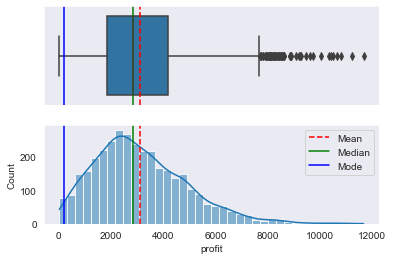

In [69]:
Metrics
sns.set_style("dark")
f, (box, hist)= plt.subplots(2, sharex= True)

mean= Metrics['profit'].mean()
median= Metrics['profit'].median()
mode= Metrics['profit'].mode().values

sns.boxplot(data= Metrics, x= 'profit', ax= box)
box.axvline(mean, color='r', linestyle='--')
box.axvline(median, color='g', linestyle='-')
box.axvline(mode[0], color='b', linestyle='-')

sns.histplot(data= Metrics, x= 'profit', ax= hist, kde=True)
hist.axvline(mean, color='r', linestyle='--', label="Mean")
hist.axvline(median, color='g', linestyle='-', label="Median")
hist.axvline(mode[0], color='b', linestyle='-', label="Mode")


hist.legend()

box.set(xlabel='')
plt.show()



In [830]:
Metrics.loc[Metrics['profit_value']>=0.85, 'profit'].sum()/Metrics.loc[Metrics['profit_value']>=0, 'profit'].sum()

0.29757153295873706

In [2707]:
Metrics.loc[(Metrics['profit_value']>=0.5), 'profit'].sum()/Metrics.loc[Metrics['profit_value']>=0, 'profit'].sum()

0.7225323449246889

# Detect Outliers

In [193]:
#DBSCAN for detecting lost customers
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

data= Metrics[['profit','revenue']]
#data= x
data= data.to_numpy().astype('float32',copy=False)
# std_scaler= StandardScaler().fit(data)
# data= std_scaler.transform(data)

rbs= StandardScaler().fit(data)
data= rbs.transform(data)
dbsc = DBSCAN(eps = .9, min_samples = 25)

dbsc.fit(data)


DBSCAN(eps=0.9, min_samples=25)

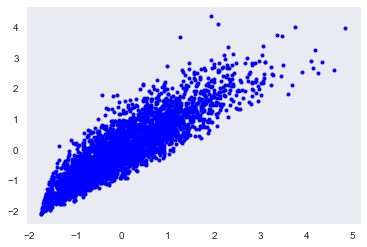

In [194]:
%matplotlib inline
x = data[:,0]
y = data[:,1]
plt.plot(x,y,'b.')


In [195]:
labels = dbsc.labels_


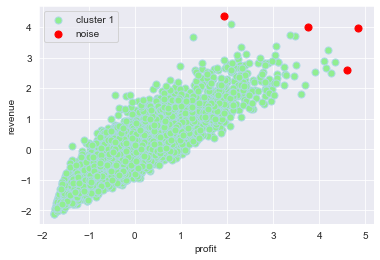

In [196]:
# plot cluster
plt.scatter(x[labels==0],
            y[labels==0],
            s=50, 
            c='lightgreen',
            marker='o', edgecolor='lightblue',
            label='cluster 1'
           )

# plot noise
plt.scatter(x[labels==-1],
            y[labels==-1],
            s=50, 
            c='red',
            marker='o', 
            edgecolor='red',
            label='noise'
           )
plt.xlabel('profit')
plt.ylabel('revenue')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [2712]:
Metrics[labels==-1]

recency  frequency    profit   revenue  frequency_3  \
customer_id                                                        
941             33.0         10  11668.95  17898.46           13   
1302            29.0         13   5336.73  17035.83           29   
1597            25.0         12   9739.46  18052.68           93   
2183             8.0         14   6513.30  19071.32           61   

             active_period  active_month  revenue_month  profit_month  \
customer_id                                                             
941                  324.0     10.451613    1712.506975   1116.473611   
1302                 325.0     10.483871    1624.956092    509.041938   
1597                 327.0     10.548387    1711.416147    923.312722   
2183                 289.0      9.322581    2045.712526    698.658478   

             first_trans  last_trans  profit_value  profit_rank  rev_value  \
customer_id                                                                  
941                  1.0        11.0         1.000          1.0      0.999   
1302                 1.0        12.0         0.888        391.0      0.998   
1597                 1.0        12.0         0.998          7.0      0.999   
2183                 3.0        12.0         0.955        157.0      1.000   

             rev_rank  decile_rank  
customer_id                         
941               3.0            9  
1302              7.0            8  
1597              3.0            9  
2183              1.0            9

In [2713]:
value_purchase= Transactions[Transactions['customer_id'].isin([1302])]#, 1129, 2183])]
value_purchase

transaction_id  product_id  customer_id transaction_date  online_order  \
1620             1621          14         1302       2017-05-15           0.0   
1702             1703          55         1302       2017-01-31           1.0   
3045             3046          48         1302       2017-12-01           0.0   
5655             5656          96         1302       2017-02-22           1.0   
5831             5832          16         1302       2017-06-16           0.0   
6010             6011          81         1302       2017-05-22           1.0   
9614             9615          61         1302       2017-04-27           1.0   
13036           13037          17         1302       2017-03-21           1.0   
13785           13786          60         1302       2017-05-11           0.0   
14527           14528          77         1302       2017-10-15           1.0   
15654           15655          76         1302       2017-05-06           0.0   
18347           18348          47         1302       2017-01-10           1.0   
19087           19088          55         1302       2017-11-05           0.0   

      order_status           brand product_line product_class product_size  \
1620      Approved   Trek Bicycles     Standard        medium        small   
1702      Approved   Trek Bicycles         Road        medium        large   
3045      Approved        WeareA2B     Standard        medium       medium   
5655      Approved        WeareA2B         Road           low        small   
5831      Approved  Norco Bicycles     Standard          high        small   
6010      Approved  Norco Bicycles     Standard        medium        small   
9614      Approved      OHM Cycles     Standard           low       medium   
13036     Approved           Solex     Standard          high       medium   
13785     Approved  Giant Bicycles     Standard          high        small   
14527     Approved  Norco Bicycles         Road        medium        large   
15654     Approved        WeareA2B     Standard           low       medium   
18347     Approved   Trek Bicycles         Road           low        small   
19087     Approved   Trek Bicycles         Road        medium        large   

       list_price  standard_cost product_first_sold_date   profit  
1620      1386.84        1234.29              2010-05-05   152.55  
1702      1894.19         598.76              1998-12-17  1295.43  
3045      1762.96         950.52              2012-04-10   812.44  
5655      1172.78        1043.77              2004-01-16   129.01  
5831      1661.92        1479.11              1996-04-05   182.81  
6010       586.45         521.94              1998-12-16    64.51  
9614        71.16          56.93              2010-11-05    14.23  
13036     1024.66         614.80              2009-03-08   409.86  
13785     1977.36        1759.85              2015-06-17   217.51  
14527     1240.31         795.10              2013-09-16   445.21  
15654      642.31         513.85              2003-09-09   128.46  
18347     1720.70        1531.42              2006-10-01   189.28  
19087     1894.19         598.76              1991-01-21  1295.43

In [2714]:
#Just a champion customer and several value buyers

#Transactions Exploration

# Customer Segmentation

In [3283]:
Metrics

recency  frequency   profit  revenue  frequency_3  active_period  \
customer_id                                                                     
1                7.0         11  3018.09  9084.45           93          352.0   
2              128.0          3  2226.26  4149.07           81          112.0   
4              195.0          2   220.57  1047.72           33           76.0   
5               16.0          6  2394.94  5903.20           56          286.0   
6               64.0          5  3946.55  5931.69           35          272.0   
...              ...        ...      ...      ...          ...            ...   
3496           256.0          4  2045.84  4725.38           99           42.0   
3497            52.0          3  1648.32  3744.07           73           68.0   
3498           127.0          6  3147.33  5177.06           28          203.0   
3499            51.0          7  4955.25  7673.48           29          301.0   
3500           144.0          6  1785.86  4922.41           71          211.0   

             active_month  revenue_month  profit_month  first_trans  \
customer_id                                                           
1               11.354839     800.050994    265.797699          1.0   
2                3.612903    1148.403304    616.196964          5.0   
4                2.451613     427.359474     89.969342          4.0   
5                9.225806     639.857343    259.591399          3.0   
6                8.774194     676.038199    449.790625          1.0   
...                   ...            ...           ...          ...   
3496             1.354839    3487.780476   1510.024762          3.0   
3497             2.193548    1706.855441    751.440000          9.0   
3498             6.548387     790.585517    480.626749          2.0   
3499             9.709677     790.291960    510.341362          1.0   
3500             6.806452     723.197678    262.377536          1.0   

             last_trans  profit_value  profit_rank  rev_value  rev_rank  \
customer_id                                                               
1                  12.0         0.530       1642.0      0.827     604.0   
2                   8.0         0.339       2310.0      0.245    2638.0   
4                   6.0         0.016       3439.0      0.018    3432.0   
5                  12.0         0.382       2160.0      0.484    1803.0   
6                  10.0         0.711       1010.0      0.488    1789.0   
...                 ...           ...          ...        ...       ...   
3496                4.0         0.288       2488.0      0.322    2369.0   
3497               11.0         0.206       2775.0      0.196    2810.0   
3498                8.0         0.555       1555.0      0.384    2153.0   
3499               11.0         0.849        527.0      0.698    1055.0   
3500                8.0         0.234       2677.0      0.349    2275.0   

             decile_rank  
customer_id               
1                      5  
2                      3  
4                      0  
5                      3  
6                      7  
...                  ...  
3496                   2  
3497                   2  
3498                   5  
3499                   8  
3500                   2  

[3495 rows x 16 columns]

In [436]:
from sklearn import mixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib.colors import LinearSegmentedColormap

In [3388]:
data=pd.DataFrame(data,columns= ['revenue'])
cl = KMeans(n_clusters= 8, random_state=42)
result = cl.fit_predict(reduced_data)
#Metrics['label']= result
C= x

C['label']= result
cmap = LinearSegmentedColormap.from_list('BlRd', ['blue', 'red', 'cyan', 'yellow', 'green', 'orange'])
# plt.scatter(Metrics['active_month'], Metrics['profit'], c= Metrics['label'], cmap= cmap )
# Metrics.sort_values(by= 'profit', ascending= False).head(1500)
scatter_matrix(C[[ "property_valuation", "tenure", 'DOB',"wealth_segment" , 'postcode_state', 'job_industry_category', 'job_title', 'decile_rank']], figsize=(12, 8), c= C['label'], cmap= cmap)

#tied=5
#spherical-5 6

ValueError: Length of values (3495) does not match length of index (3419)

In [333]:
Metrics.corr()

recency  frequency    profit   revenue  frequency_3  \
recency        1.000000  -0.383862 -0.286492 -0.329696    -0.008596   
frequency     -0.383862   1.000000  0.717304  0.869939    -0.002427   
profit        -0.286492   0.717304  1.000000  0.879887     0.022735   
revenue       -0.329696   0.869939  0.879887  1.000000     0.005049   
frequency_3   -0.008596  -0.002427  0.022735  0.005049     1.000000   
active_period -0.660194   0.559906  0.411789  0.485096     0.004782   
active_month  -0.662989   0.557331  0.409605  0.482489     0.005026   
revenue_month  0.234316   0.253106  0.394934  0.434386    -0.013740   
profit_month   0.163986   0.220073  0.571786  0.415371     0.010725   
first_trans   -0.059199  -0.378042 -0.271274 -0.330392    -0.000220   
last_trans    -0.963437   0.390928  0.290851  0.334466     0.004431   
profit_value  -0.292404   0.710402  0.960438  0.857238     0.026823   
profit_rank    0.292359  -0.710391 -0.960433 -0.857229    -0.026818   
rev_value     -0.321252   0.853624  0.851167  0.970210     0.007681   
rev_rank       0.321204  -0.853615 -0.851164 -0.970204    -0.007682   
decile_rank   -0.286711   0.703911  0.950693  0.849619     0.028212   

               active_period  active_month  revenue_month  profit_month  \
recency            -0.660194     -0.662989       0.234316      0.163986   
frequency           0.559906      0.557331       0.253106      0.220073   
profit              0.411789      0.409605       0.394934      0.571786   
revenue             0.485096      0.482489       0.434386      0.415371   
frequency_3         0.004782      0.005026      -0.013740      0.010725   
active_period       1.000000      0.998896      -0.424357     -0.324968   
active_month        0.998896      1.000000      -0.425020     -0.326316   
revenue_month      -0.424357     -0.425020       1.000000      0.865630   
profit_month       -0.324968     -0.326316       0.865630      1.000000   
first_trans        -0.683992     -0.680005       0.302745      0.248315   
last_trans          0.684773      0.686965      -0.280093     -0.199736   
profit_value        0.423281      0.420688       0.379097      0.552094   
profit_rank        -0.423266     -0.420672      -0.379093     -0.552097   
rev_value           0.487563      0.485520       0.410680      0.393992   
rev_rank           -0.487551     -0.485508      -0.410676     -0.393992   
decile_rank         0.418081      0.415802       0.374523      0.544864   

               first_trans  last_trans  profit_value  profit_rank  rev_value  \
recency          -0.059199   -0.963437     -0.292404     0.292359  -0.321252   
frequency        -0.378042    0.390928      0.710402    -0.710391   0.853624   
profit           -0.271274    0.290851      0.960438    -0.960433   0.851167   
revenue          -0.330392    0.334466      0.857238    -0.857229   0.970210   
frequency_3      -0.000220    0.004431      0.026823    -0.026818   0.007681   
active_period    -0.683992    0.684773      0.423281    -0.423266   0.487563   
active_month     -0.680005    0.686965      0.420688    -0.420672   0.485520   
revenue_month     0.302745   -0.280093      0.379097    -0.379093   0.410680   
profit_month      0.248315   -0.199736      0.552094    -0.552097   0.393992   
first_trans       1.000000    0.043364     -0.280168     0.280170  -0.338437   
last_trans        0.043364    1.000000      0.297963    -0.297940   0.329575   
profit_value     -0.280168    0.297963      1.000000    -1.000000   0.874776   
profit_rank       0.280170   -0.297940     -1.000000     1.000000  -0.874772   
rev_value        -0.338437    0.329575      0.874776    -0.874772   1.000000   
rev_rank          0.338445   -0.329549     -0.874775     0.874771  -1.000000   
decile_rank      -0.277813    0.293229      0.994986    -0.994987   0.870802   

               rev_rank  decile_rank  
recency        0.321204    -0.286711  
frequency     -0.853615     0.703911  
profit        -0.851164     0.950693  
revenue       -

# Customer classification

In [751]:
top= x.sort_values(by= 'result').tail(350)
top

#top['job_title'].value_counts().to_frame().head(50)
top['result'].sum()/Customer['total_profit'].sum()

0.2142344515452425

from statsmodels.graphics.mosaicplot import mosaic
mosaic(top, ['owns_car', 'gender'])

In [1597]:
x

gender     wealth_segment  DOB  property_valuation  tenure owns_car  \
0         F      Mass Customer  0.0                   2     2.0      Yes   
1         M      Mass Customer  5.0                   2     3.0      Yes   
2         M      Mass Customer  1.0                   2     1.0       No   
3         F  Affluent Customer  4.0                   0     1.0      Yes   
4         M     High Net Worth  1.0                   2     3.0      Yes   
...     ...                ...  ...                 ...     ...      ...   
3491      M      Mass Customer  6.0                   2     4.0      Yes   
3492      F  Affluent Customer  6.0                   0     4.0      Yes   
3493      F      Mass Customer  7.0                   0     0.0       No   
3494      M      Mass Customer  5.0                   2     1.0      Yes   
3495      F  Affluent Customer  2.0                   2     4.0       No   

     job_industry_category                    job_title state   result  
0                   Health          Executive Secretary   NSW  3018.09  
1       Financial Services       Administrative Officer   NSW  2226.26  
2                       IT                          NaN   QLD   220.57  
3                      NaN                Senior Editor   NSW  2394.94  
4                   Retail                          NaN   VIC  3946.55  
...                    ...                          ...   ...      ...  
3491         Manufacturing                       Editor   NSW  2045.84  
3492         Manufacturing  Administrative Assistant IV   VIC  1648.32  
3493         Manufacturing                          NaN   VIC  3147.33  
3494         Manufacturing                          NaN   QLD  4955.25  
3495         Entertainment                          NaN   NSW  1785.86  

[3495 rows x 10 columns]

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

In [72]:
num_pipeline = Pipeline([('robust', RobustScaler())])
#num_pipeline = Pipeline([('mm', MinMaxScaler())])
#Target 
#y= result
Customer['decile_rank']= pd.qcut(Customer['total_revenue'], q = 4, labels = False)
#Customer['postcode_state']= Customer['postcode'].astype('str')+ Customer['state']  
#Attributes
x= Customer[[ "past_3_years_bike_related_purchases", "gender", "wealth_segment", 'DOB', "property_valuation", "tenure", 'owns_car', 'job_industry_category', 'job_title', 'state', 'decile_rank']]
#fw= [2, 1, 2, 1, 1, 2, 1, 6, 1] "wealth_segment", 'DOB', "property_valuation", "tenure",
#x['property_valuation'] = pd.qcut(x['property_valuation'], 4, labels= [0, 1, 2, 3]).astype('int')
#x['tenure'] = pd.qcut(x['tenure'], 5, labels= [0, 1, 2, 3, 4]).astype('float')
x['DOB']= x['DOB'].dt.year
x['DOB']= 2017-x['DOB']
#x['DOB'] = pd.qcut(x['DOB'], 9, labels= [0, 1, 2, 3, 4, 5, 6, 7, 8]).astype('float')
#x['default']= encoder.fit_transform(x['default'].fillna('Unknown').astype('string'))
x['result']= Customer[['total_profit']]
#x['result']= Customer[['label']] 
#x['result']= Customer[['decile_rank']] 
#x['result']= Customer[['frequency']] 
#x['result']= Customer[['total_revenue']]
#x['result']= y_km
x['label']= np.where(x['result']> 5486, 'top', 'rest')
#x['job_title']= np.where(x['job_title']== 'Marketing Manager', 'Marketing Manager', 'other jobs')
#x.drop(['decile_rank'], axis=1, inplace = True)
#x=x[x.gender != 2]
#x['result']= np.where(x['result']>= 10295, 1, 0)
x

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

past_3_years_bike_related_purchases gender     wealth_segment   DOB  \
0                                      93      F      Mass Customer  64.0   
1                                      81      M      Mass Customer  37.0   
2                                      33      M      Mass Customer  56.0   
3                                      56      F  Affluent Customer  40.0   
4                                      35      M     High Net Worth  51.0   
...                                   ...    ...                ...   ...   
3491                                   99      M      Mass Customer  31.0   
3492                                   73      F  Affluent Customer  31.0   
3493                                   28      F      Mass Customer  22.0   
3494                                   29      M      Mass Customer  38.0   
3495                                   71      F  Affluent Customer  50.0   

      property_valuation  tenure owns_car job_industry_category  \
0                     10    11.0      Yes                Health   
1                     10    16.0      Yes    Financial Services   
2                      9     7.0       No                    IT   
3                      4     8.0      Yes                   NaN   
4                      9    13.0      Yes                Retail   
...                  ...     ...      ...                   ...   
3491                   9    19.0      Yes         Manufacturing   
3492                   5    18.0      Yes         Manufacturing   
3493                   4     5.0       No         Manufacturing   
3494                   9     7.0      Yes         Manufacturing   
3495                  10    17.0       No         Entertainment   

                        job_title state  decile_rank   result label  
0             Executive Secretary   NSW            3  3018.09  rest  
1          Administrative Officer   NSW            0  2226.26  rest  
2                             NaN   QLD            0   220.57  rest  
3                   Senior Editor   NSW            1  2394.94  rest  
4                             NaN   VIC            1  3946.55  rest  
...                           ...   ...          ...      ...   ...  
3491                       Editor   NSW            1  2045.84  rest  
3492  Administrative Assistant IV   VIC            0  1648.32  rest  
3493                          NaN   VIC            1  3147.33  rest  
3494                          NaN   QLD            2  4955.25  rest  
3495                          NaN   NSW            1  1785.86  rest  

[3495 rows x 13 columns]

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Admin\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



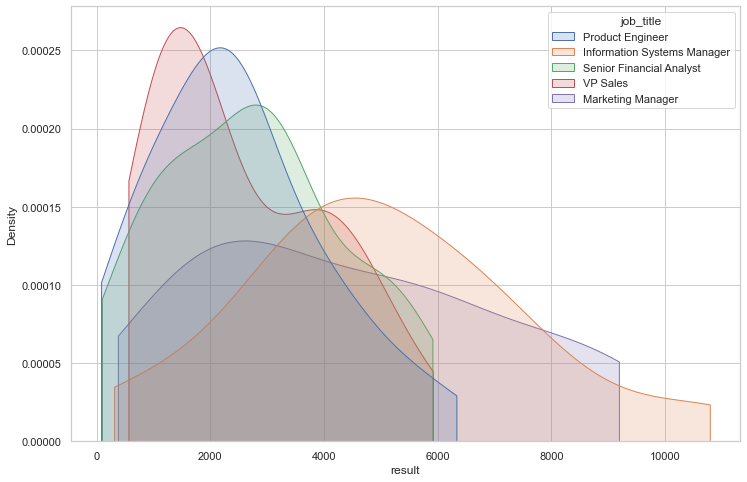

In [1178]:
plt.rcParams["figure.figsize"]=12,8

# set seaborn whitegrid theme
sns.set(style="whitegrid")
job= x.loc[x['job_title'].isin(h['group1'])]
# Without transparency
sns.kdeplot(data= job, x= "result", hue= "job_title", cut=0, fill=True, common_norm=False, alpha=0.2)
plt.show()

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\Admin\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


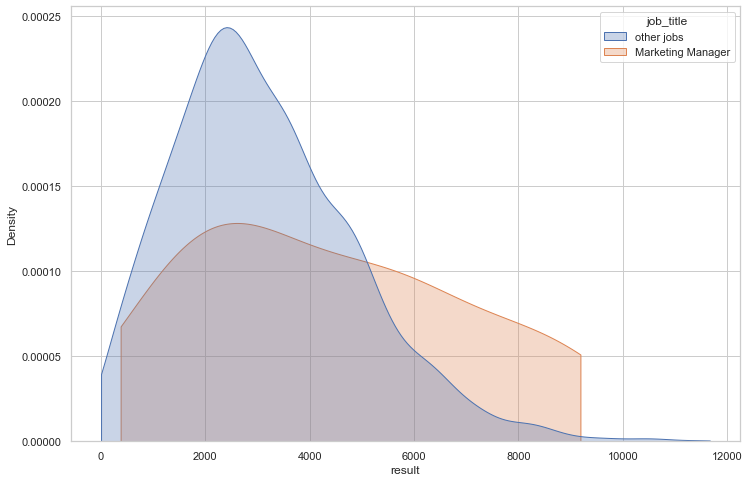

In [1027]:
plt.rcParams["figure.figsize"]=12,8

# set seaborn whitegrid theme
sns.set(style="whitegrid")

# Without transparency
sns.kdeplot(data= x, x= 'result', hue= 'job_title', cut=0, fill=True, common_norm=False, alpha=0.3)
plt.show()

In [839]:

# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

table= c
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

result                       0  1
job_title                        
Account Coordinator         23  2
Account Executive           28  2
Account Representative I     9  1
Account Representative II    4  0
Account Representative III   5  1
...                         .. ..
Web Designer IV             10  0
Web Developer I              5  1
Web Developer II             5  1
Web Developer III            8  0
Web Developer IV             1  2

[195 rows x 2 columns]
dof=194
[[22.42754803  2.57245197]
 [26.91305764  3.08694236]
 [ 8.97101921  1.02898079]
 [ 3.58840768  0.41159232]
 [ 5.38261153  0.61738847]
 [10.76522305  1.23477695]
 [ 6.27971345  0.72028655]
 [ 4.48550961  0.51449039]
 [ 8.07391729  0.92608271]
 [ 8.97101921  1.02898079]
 [ 7.17681537  0.82318463]
 [ 8.07391729  0.92608271]
 [ 7.17681537  0.82318463]
 [ 4.48550961  0.51449039]
 [22.42754803  2.57245197]
 [ 2.69130576  0.30869424]
 [ 3.58840768  0.41159232]
 [ 8.07391729  0.92608271]
 [13.45652882  1.54347118]
 [29.6043634 

In [634]:
def Encode():
    
    global x#, top
    #x= x.dropna(axis= 0, inplace= True)
    car_code= {'No': 0, 'Yes': 1}
    x['owns_car']= x.owns_car.map(car_code)

    gender_code= {'M': 0, 'F': 1, 'U': 2}
    x['gender']= x.gender.map(gender_code)

    wealth_code= {'Mass Customer': 0, 'Affluent Customer': 1, 'High Net Worth': 2}
    x['wealth_segment']= x.wealth_segment.map(wealth_code)
    
    onehot1= pd.get_dummies(x['job_industry_category'])
    onehot2= pd.get_dummies(x['job_title'])
    x= x.join(onehot1)
    x= x.join(onehot2)
      x= x.drop(['owns_car',  'gender', 'wealth_segment'], axis= 1)
    print(x)
    
# #     state_code= {'NSW': 0, 'VIC': 1, 'QLD': 2}
# #     x['state']= x.state.map(state_code)


    
#     top_cnt= top['job_title'].value_counts().to_frame(name= 'top_cnt')
#     total_cnt= Customer['job_title'].value_counts().to_frame(name= 'total_cnt')
#     cnt= pd.concat([top_cnt, total_cnt], axis=1).fillna(0).rename_axis(['title']).reset_index()
#     cnt['encode']= np.round((cnt['top_cnt']/cnt['total_cnt']* 100))
#     cnt.drop(['top_cnt', 'total_cnt'], axis= 1, inplace= True)
#     x= pd.merge(x, cnt, left_on= 'job_title', right_on= 'title', how='left')

#     top_cnt= top['job_industry_category'].value_counts().to_frame(name= 'top_cnt')
#     total_cnt= Customer['job_industry_category'].value_counts().to_frame(name= 'total_cnt')
#     cnt= pd.concat([top_cnt, total_cnt], axis=1).fillna(0).rename_axis(['industry_category']).reset_index()
#     cnt
#     cnt['encode_industry']= np.round((cnt['top_cnt']/cnt['total_cnt']* 100))
#     cnt.drop(['top_cnt', 'total_cnt'], axis= 1, inplace= True)

#     x= pd.merge(x, cnt, left_on= 'job_industry_category', right_on= 'industry_category', how='left')
    
#     x= x.drop(['job_industry_category', 'industry_category'], axis= 1)
#     x= x.drop(['title', 'job_title'], axis= 1)


IndentationError: unexpected indent (3894451629.py, line 18)

In [91]:
Split()
Encode()

      gender  past_3_years_bike_related_purchases  wealth_segment     DOB  \
0          1                                   93               0  1953.0   
1          0                                   81               0  1980.0   
2          0                                   33               0  1961.0   
3          1                                   56               1  1977.0   
4          0                                   35               2  1966.0   
...      ...                                  ...             ...     ...   
3491       0                                   99               0  1986.0   
3492       1                                   73               1  1986.0   
3493       1                                   28               0  1995.0   
3494       0                                   29               0  1979.0   
3495       1                                   71               1  1967.0   

      property_valuation  tenure  owns_car job_industry_category  \
0      

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [582]:
from sklearn.impute import KNNImputer

def Fillnan():
    global x
    imputer= KNNImputer(n_neighbors= 10)
    x_filled= imputer.fit_transform(x[['gender', 'encode', 'encode_industry', 'tenure', 'DOB']])#'job_title', 'job_industry_category']])
    x['job_title']= x_filled[:, 1]
    x['job_industry_category']= x_filled[:, 2]
    x['tenure']= x_filled[:, 3]
    x['DOB']= x_filled[:, 4]
    x= x.drop(['encode', 'encode_industry', 'owns_car',  'gender', 'job_industry_category'], axis= 1)

In [244]:
from sklearn.model_selection import train_test_split

def Split():
    
    global x
    global x_train
    global x_test
    global y_train
    global y_test
    global y
    x['result']= np.where(x['result']>= 10295, 1, 0)
    #x.dropna(axis= 0, inplace= True)
    y= x['result']
    x.drop(['result'], axis= 1, inplace = True)
    
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, stratify= y, random_state= 42)

In [166]:
from sklearn.preprocessing import StandardScaler
def scale(df):
    std= StandardScaler().fit(df)
    df= std.transform(df)
    return df

x_train= scale(x_train)
x_test= scale(x_test)
#x= scale(x)

In [167]:
#To deal with imbalanced class
import imblearn
from imblearn.over_sampling import SMOTE

def Oversamp():
    global x_train
    global y_train
    smote = SMOTE()
    x_train, y_train= smote.fit_resample(x_train, y_train)

In [168]:
# from xgboost import plot_importance
# plot_importance(xgb)


In [863]:

#Customer['decile_rank']= pd.qcut(Customer['total_revenue'], q = 10, labels = False)
#Customer['postcode_state']= Customer['postcode'].astype('str')+ Customer['state']  
#Attributes
x= Customer[[ "customer_id", "gender", "past_3_years_bike_related_purchases", "wealth_segment", 'DOB', "property_valuation", 'tenure', 'owns_car', 'job_industry_category', 'job_title', "period", "frequency", "recency", "revenue", "profit"]]
x['DOB']= x['DOB'].dt.year
#x['first_purchase']= pd.to_datetime(x['first_purchase'], errors='coerce').dt.strftime('%m')
#x['result']= Customer[['total_revenue']]

x


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


customer_id gender  past_3_years_bike_related_purchases  \
0               1      F                                   93   
1               2      M                                   81   
2               4      M                                   33   
3               5      F                                   56   
4               6      M                                   35   
...           ...    ...                                  ...   
3491         3496      M                                   99   
3492         3497      F                                   73   
3493         3498      F                                   28   
3494         3499      M                                   29   
3495         3500      F                                   71   

         wealth_segment     DOB  property_valuation  tenure owns_car  \
0         Mass Customer  1953.0                  10    11.0      Yes   
1         Mass Customer  1980.0                  10    16.0      Yes   
2         Mass Customer  1961.0                   9     7.0       No   
3     Affluent Customer  1977.0                   4     8.0      Yes   
4        High Net Worth  1966.0                   9    13.0      Yes   
...                 ...     ...                 ...     ...      ...   
3491      Mass Customer  1986.0                   9    19.0      Yes   
3492  Affluent Customer  1986.0                   5    18.0      Yes   
3493      Mass Customer  1995.0                   4     5.0       No   
3494      Mass Customer  1979.0                   9     7.0      Yes   
3495  Affluent Customer  1967.0                  10    17.0       No   

     job_industry_category                    job_title  period  frequency  \
0                   Health          Executive Secretary   352.0         11   
1       Financial Services       Administrative Officer   112.0          3   
2                       IT                          NaN    76.0          2   
3                      NaN                Senior Editor   286.0          6   
4                   Retail                          NaN   272.0          5   
...                    ...                          ...     ...        ...   
3491         Manufacturing                       Editor    42.0          4   
3492         Manufacturing  Administrative Assistant IV    68.0          3   
3493         Manufacturing                          NaN   203.0          6   
3494         Manufacturing                          NaN   301.0          7   
3495         Entertainment                          NaN   211.0          6   

      recency  revenue   profit  
0       346.0  9084.45  3018.09  
1       225.0  4149.07  2226.26  
2       158.0  1047.72   220.57  
3       337.0  5903.20  2394.94  
4       289.0  5931.69  3946.55  
...       ...      ...      ...  
3491     97.0  4725.38  2045.84  
3492    301.0  3744.07  1648.32  
3493    226.0  5177.06  3147.33  
3494    302.0  7673.48  4955.25  
3495    209.0  4922.41  1785.86  

[3495 rows x 15 columns]

In [864]:
# top= x.sort_values(by= 'result').tail(350)
# top

In [865]:
Encode()
#Fillnan()
#Split()
#Oversamp()

      customer_id  gender  past_3_years_bike_related_purchases  \
0               1       1                                   93   
1               2       0                                   81   
2               4       0                                   33   
3               5       1                                   56   
4               6       0                                   35   
...           ...     ...                                  ...   
3491         3496       0                                   99   
3492         3497       1                                   73   
3493         3498       1                                   28   
3494         3499       0                                   29   
3495         3500       1                                   71   

      wealth_segment     DOB  property_valuation  tenure  owns_car  \
0                  0  1953.0                  10    11.0         1   
1                  0  1980.0                  10    16.0         1 

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [748]:
feature_important = xgb.get_booster().get_score(importance_type='weight')
feature_important
# keys = list(feature_important.keys())
# values = list(feature_important.values())

# data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
# data.plot(kind='barh', figsize = (20,10)) 

NameError: name 'xgb' is not defined

In [769]:
x

customer_id  gender  past_3_years_bike_related_purchases  \
0               1       1                                   93   
1               2       0                                   81   
2               4       0                                   33   
3               5       1                                   56   
4               6       0                                   35   
...           ...     ...                                  ...   
3491         3496       0                                   99   
3492         3497       1                                   73   
3493         3498       1                                   28   
3494         3499       0                                   29   
3495         3500       1                                   71   

      wealth_segment     DOB  property_valuation  tenure  owns_car  \
0                  0  1953.0                  10    11.0         1   
1                  0  1980.0                  10    16.0         1   
2                  0  1961.0                   9     7.0         0   
3                  1  1977.0                   4     8.0         1   
4                  2  1966.0                   9    13.0         1   
...              ...     ...                 ...     ...       ...   
3491               0  1986.0                   9    19.0         1   
3492               1  1986.0                   5    18.0         1   
3493               0  1995.0                   4     5.0         0   
3494               0  1979.0                   9     7.0         1   
3495               1  1967.0                  10    17.0         0   

     job_industry_category                    job_title       first_purchase  \
0                   Health          Executive Secretary  2017-12-23 00:00:00   
1       Financial Services       Administrative Officer  2017-08-24 00:00:00   
2                       IT                          NaN  2017-06-18 00:00:00   
3                      NaN                Senior Editor  2017-12-14 00:00:00   
4                   Retail                          NaN  2017-10-27 00:00:00   
...                    ...                          ...                  ...   
3491         Manufacturing                       Editor  2017-04-18 00:00:00   
3492         Manufacturing  Administrative Assistant IV  2017-11-08 00:00:00   
3493         Manufacturing                          NaN  2017-08-25 00:00:00   
3494         Manufacturing                          NaN  2017-11-09 00:00:00   
3495         Entertainment                          NaN  2017-08-08 00:00:00   

      frequency  recency  revenue   profit  Argiculture  Entertainment  \
0            11    346.0  9084.45  3018.09            0              0   
1             3    225.0  4149.07  2226.26            0              0   
2             2    158.0  1047.72   220.57            0              0   
3             6    337.0  5903.20  2394.94            0              0   
4             5    289.0  5931.69  3946.55            0              0   
...         ...      ...      ...      ...          ...            ...   
3491          4     97.0  4725.38  2045.84            0              0   
3492          3    301.0  3744.07  1648.32            0              0   
3493          6    226.0  5177.06  3147.33            0              0   
3494          7    302.0  7673.48  4955.25            0              0   
3495          6    209.0  4922.41  1785.86            0              1   

      Financial Services  Health  IT  Manufacturing  Property  Retail  \
0                      0       1   0              0         0       0   
1                      1       0   0              0         0       0   
2                      0       0   1              0         0       0   
3                      0       0   0              0         0       0   
4                      0       0   0              0         0       1   
...                  ...     ...  ..            ...       ...     ...   
3491       

In [92]:
import os
os.environ['PATH'] += os.pathsep + r'C:/UsersAdmin/Anaconda3/pkgs/graphviz-2.38-hfd603c8_2/bin/'

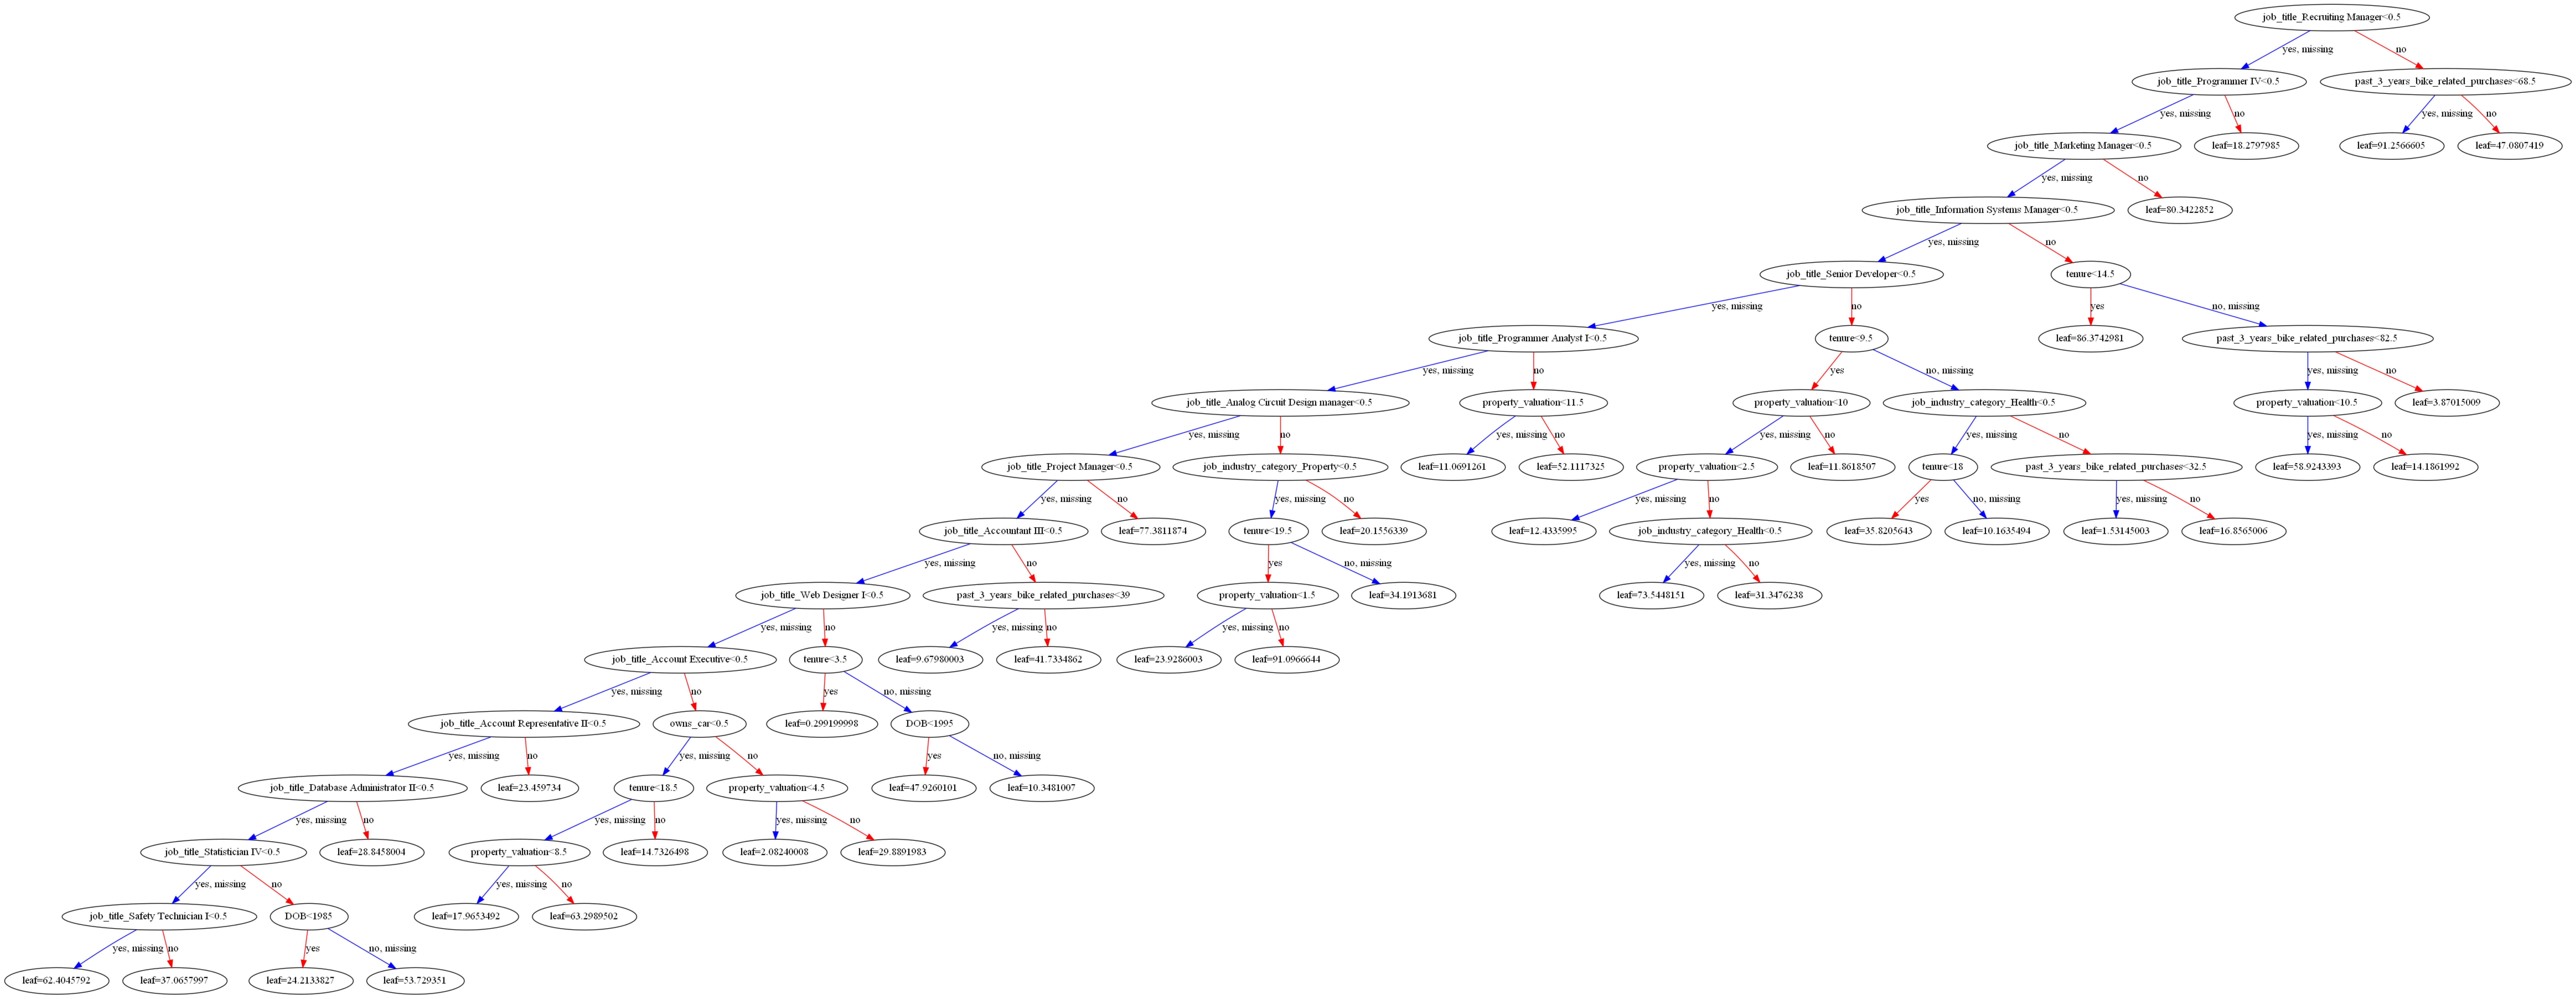

In [428]:

from xgboost import plot_tree

fig, ax = plt.subplots(figsize=(200, 200))
plot_tree(xgb, num_trees=0, ax=ax)
plt.show()

In [197]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.cluster import KMeans

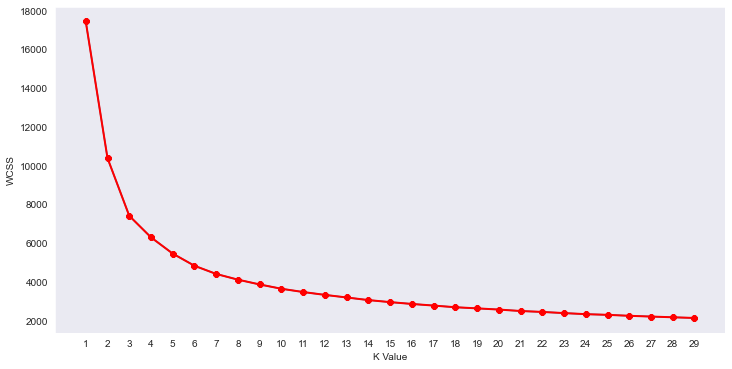

In [880]:
x= x.loc[x['revenue']!= 0]

RFRP= ["recency", "frequency", "period", "revenue", "profit"]#, "DOB"]#, "past_3_years_bike_related_purchases", 'DOB', "property_valuation", 'tenure']
x[RFRP]= scale(x[RFRP])
wcss=[]
for i in range(1, 30, 1):
    km=KMeans(n_clusters=i)
    km.fit(x[RFRP])
    wcss.append(km.inertia_)
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1, 30, 1),wcss)
plt.plot(range(1, 30, 1),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 30, 1))
plt.ylabel("WCSS")
plt.show()

In [881]:
pd.set_option('display.max_columns', None)

km1=KMeans(n_clusters= 10, random_state= 42)
#Fitting the input data
km1.fit(x[RFRP])
#predicting the labels of the input data
y=km1.predict(x[RFRP])
#adding the labels to a column named label
x["label"] = y
#The new dataframe with the clustering done
x.head()

customer_id  gender  past_3_years_bike_related_purchases  wealth_segment  \
0            1       1                                   93               0   
1            2       0                                   81               0   
2            4       0                                   33               0   
3            5       1                                   56               1   
4            6       0                                   35               2   

      DOB  property_valuation  tenure  owns_car job_industry_category  \
0  1953.0                  10    11.0         1                Health   
1  1980.0                  10    16.0         1    Financial Services   
2  1961.0                   9     7.0         0                    IT   
3  1977.0                   4     8.0         1                   NaN   
4  1966.0                   9    13.0         1                Retail   

                job_title    period  frequency   recency   revenue    profit  \
0     Executive Secretary  1.362829   2.269365  0.930603  0.928931 -0.071251   
1  Administrative Officer -1.576328  -1.170494 -1.162561 -0.740374 -0.518129   
2                     NaN -2.017201  -1.600476 -2.321586 -1.789351 -1.650062   
3           Senior Editor  0.554561   0.119453  0.774913 -0.147071 -0.422932   
4                     NaN  0.383110  -0.310529 -0.055433 -0.137434  0.452736   

   Argiculture  Entertainment  Financial Services  Health  IT  Manufacturing  \
0            0              0                   0       1   0              0   
1            0              0                   1       0   0              0   
2            0              0                   0       0   1              0   
3            0              0                   0       0   0              0   
4            0              0                   0       0   0              0   

   Property  Retail  Telecommunications  Account Coordinator  \
0         0       0                   0                    0   
1         0       0                   0                    0   
2         0       0                   0                    0   
3         0       0                   0                    0   
4         0       1                   0                    0   

   Account Executive  Account Representative I  Account Representative II  \
0                  0                         0                          0   
1                  0                         0                          0   
2                  0                         0                          0   
3                  0                         0                          0   
4                  0                         0                          0   

   Account Representative III  Account Representative IV  Accountant I  \
0                           0                          0             0   
1                           0                          0             0   
2                           0                          0             0   
3                           0                          0             0   
4                           0                          0             0   

   Accountant II  Accountant III  Accountant IV  Accounting Assistant I  \
0              0               0              0                       0   
1              0               0              0                       0   
2              0               0              0                       0   
3              0               0              0                       0   
4              0               0              0                       0   

   Accounting Assistant II  Accounting Assistant III  Accounting Assistant IV  \
0                        0                         0                        0   
1                        0                         0                        0   
2                        0                         0                        0   
3                        0                         0       

In [882]:
CountCluster= x.groupby(by= "label").count()
MeanCluster= x.groupby(by= "label").mean().round(3)

In [883]:
CountCluster

customer_id  gender  past_3_years_bike_related_purchases  \
label                                                             
0              368     368                                  368   
1              319     319                                  319   
2              591     591                                  591   
3              275     275                                  275   
4              211     211                                  211   
5              194     194                                  194   
6              196     196                                  196   
7              466     466                                  466   
8              457     457                                  457   
9              411     411                                  411   

       wealth_segment  DOB  property_valuation  tenure  owns_car  \
label                                                              
0                 368  362                 368     362       368   
1                 319  313                 319     313       319   
2                 591  576                 591     576       591   
3                 275  270                 275     270       275   
4                 211  206                 211     206       211   
5                 194  192                 194     192       194   
6                 196  193                 196     193       196   
7                 466  457                 466     457       466   
8                 457  447                 457     447       457   
9                 411  396                 411     396       411   

       job_industry_category  job_title  period  frequency  recency  revenue  \
label                                                                          
0                        307        311     368        368      368      368   
1                        275        288     319        319      319      319   
2                        492        520     591        591      591      591   
3                        219        244     275        275      275      275   
4                        171        185     211        211      211      211   
5                        169        173     194        194      194      194   
6                        159        177     196        196      196      196   
7                        392        399     466        466      466      466   
8                        395        409     457        457      457      457   
9                        349        361     411        411      411      411   

       profit  Argiculture  Entertainment  Financial Services  Health   IT  \
label                                                                        
0         368          368            368                 368     368  368   
1         319          319            319                 319     319  319   
2         591          591            591                 591     591  591   
3         275          275            275                 275     275  275   
4         211          211            211                 211     211  211   
5         194          194            194                 194     194  194   
6         196          196            196                 196     196  196   
7         466          466            466                 466     466  466   
8         457          457            457                 457     457  457   
9         411          411            411                 411     411  411   

       Manufacturing  Property  Retail  Telecommunications  \
label                                                        
0                368       368     368                 368   
1                319       319     319                 319   
2                591       591     591                 591   
3                275       275     275                 275   
4                211       211     211                 211   
5                194       194     194               

In [884]:
MeanCluster

customer_id  gender  past_3_years_bike_related_purchases  \
label                                                             
0         1807.587   0.546                               48.538   
1         1791.295   0.542                               52.160   
2         1709.780   0.550                               47.604   
3         1742.407   0.542                               51.076   
4         1772.635   0.578                               50.118   
5         1761.392   0.541                               46.557   
6         1719.633   0.531                               48.036   
7         1749.277   0.541                               47.891   
8         1793.996   0.565                               48.265   
9         1699.039   0.538                               48.937   

       wealth_segment       DOB  property_valuation  tenure  owns_car  period  \
label                                                                           
0               0.742  1977.599               7.438  10.856     0.473  -0.189   
1               0.737  1976.137               7.260  11.019     0.536  -0.065   
2               0.766  1977.010               7.489  10.372     0.528   0.785   
3               0.778  1975.307               7.753  10.504     0.502  -0.898   
4               0.758  1976.976               7.147  10.641     0.540  -1.888   
5               0.675  1978.448               7.686  10.760     0.479  -2.025   
6               0.730  1978.420               7.485  10.560     0.490   0.732   
7               0.764  1978.330               7.620  10.475     0.496  -0.270   
8               0.807  1976.987               7.718  10.689     0.508   0.742   
9               0.740  1976.881               7.445  11.073     0.501   0.749   

       frequency  recency  revenue  profit  Argiculture  Entertainment  \
label                                                                    
0         -0.917   -0.125   -0.984  -0.943        0.019          0.024   
1          0.541   -0.265    0.824   0.932        0.031          0.053   
2          0.332    0.633    0.223   0.143        0.030          0.032   
3         -0.300   -1.513   -0.190  -0.189        0.022          0.051   
4         -1.317   -0.134   -1.221  -1.028        0.028          0.052   
5         -1.394   -2.619   -1.278  -1.119        0.026          0.041   
6          1.866    0.552    2.226   2.294        0.010          0.041   
7         -0.137    0.072   -0.150  -0.128        0.041          0.030   
8         -0.497    0.683   -0.681  -0.682        0.035          0.026   
9          1.277    0.622    1.143   0.907        0.027          0.027   

       Financial Services  Health     IT  Manufacturing  Property  Retail  \
label                                                                       
0                   0.198   0.177  0.054          0.179     0.082   0.084   
1                   0.182   0.116  0.053          0.241     0.082   0.088   
2                   0.215   0.135  0.054          0.206     0.058   0.081   
3                   0.185   0.124  0.040          0.211     0.058   0.087   
4                   0.204   0.123  0.057          0.175     0.071   0.081   
5                   0.222   0.144  0.046          0.196     0.052   0.108   
6                   0.173   0.194  0.051          0.158     0.061   0.112   
7                   0.163   0.152  0.067          0.236     0.060   0.075   
8                   0.201   0.182  0.046          0.195     0.081   0.085   
9                   0.217   0.170  0.058          0.182     0.054   0.095   

       Telecommunications  Account Coordinator  Account Executive  \
label                                                               
0                   0.016                0.008              0.016   
1                   0.016                0.003              0.009   
2                   0.020                0.008              0.014   
3                   0.018                0.011              0.004   
4

<AxesSubplot:xlabel='label', ylabel='recency'>

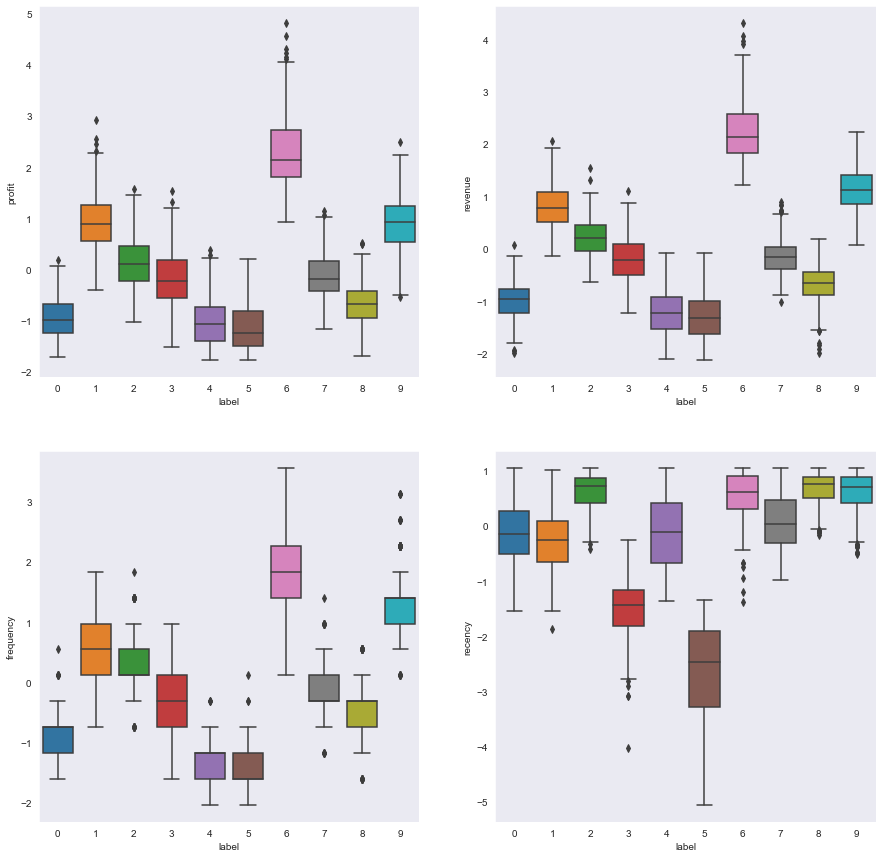

In [885]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.boxplot(ax= axes[0, 0], x= 'label', y= 'profit', data= x)
#axes[0, 0].set_title('profit')
sns.boxplot(ax= axes[0, 1], x= 'label', y= 'revenue', data= x)
#axes[0, 1].set_title('revenue')
sns.boxplot(ax= axes[1, 0], x= 'label', y= 'frequency', data= x)
#axes[1, 0].set_title('frequency')
sns.boxplot(ax= axes[1, 1], x= 'label', y= 'recency', data= x)
#axes[1, 1].set_title('recency')


<AxesSubplot:xlabel='label', ylabel='period'>

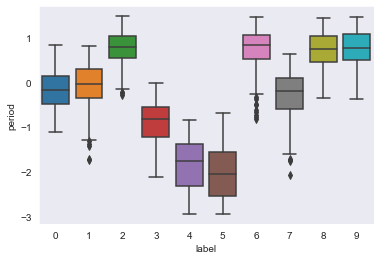

In [886]:
sns.boxplot(x= 'label', y= 'period', data= x)

> Group 2: Highest profit, highest revenue, highest frequency, latest purchase -> Diamond Customer (146 customer, <5%)

> Group 5: large spending, large profit, large frequency, good recency -> Gold Customer (316 customers, <10%)

> Group 7: Medium Spending, large profit, medium frequency, mid recency -> Favourite Customer (381 customers, 10%)

> Group 

> Group 8: Barely to low on both monetary value and frequency value, and bad recycency (had the last purchase a long time ago) -> Insignificant Random Customer (136 customers < 5%)

In [650]:

for column in MeanCluster.columns[12:]:
    print(MeanCluster[column])

label
0    0.022
1    0.028
2    0.036
3    0.030
4    0.044
5    0.028
6    0.014
7    0.022
8    0.000
9    0.033
Name: Argiculture, dtype: float64
label
0    0.040
1    0.028
2    0.026
3    0.039
4    0.032
5    0.047
6    0.052
7    0.024
8    0.022
9    0.039
Name: Entertainment, dtype: float64
label
0    0.217
1    0.191
2    0.203
3    0.187
4    0.182
5    0.210
6    0.193
7    0.231
8    0.213
9    0.173
Name: Financial Services, dtype: float64
label
0    0.146
1    0.151
2    0.151
3    0.155
4    0.158
5    0.122
6    0.160
7    0.159
8    0.225
9    0.144
Name: Health, dtype: float64
label
0    0.066
1    0.050
2    0.059
3    0.041
4    0.056
5    0.060
6    0.052
7    0.055
8    0.067
9    0.057
Name: IT, dtype: float64
label
0    0.208
1    0.212
2    0.190
3    0.188
4    0.229
5    0.197
6    0.160
7    0.183
8    0.202
9    0.234
Name: Manufacturing, dtype: float64
label
0    0.049
1    0.054
2    0.075
3    0.077
4    0.059
5    0.056
6    0.071
7    0.081
8    0.03

<AxesSubplot:xlabel='label', ylabel='DOB'>

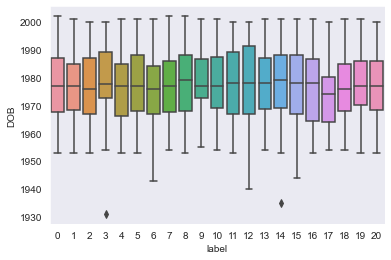

In [574]:
sns.boxplot(x= 'label', y= 'DOB', data= x)

<AxesSubplot:xlabel='label', ylabel='past_3_years_bike_related_purchases'>

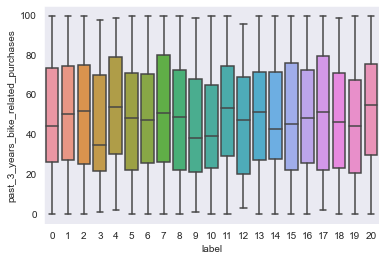

In [575]:
sns.boxplot(x= 'label', y= 'past_3_years_bike_related_purchases', data= x)

<AxesSubplot:xlabel='label', ylabel='property_valuation'>

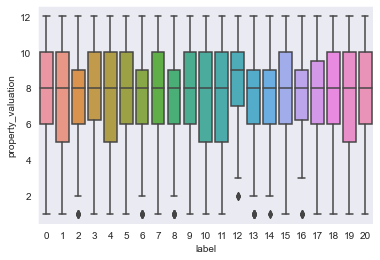

In [576]:
sns.boxplot(x= 'label', y= 'property_valuation', data= x)

<AxesSubplot:xlabel='label', ylabel='tenure'>

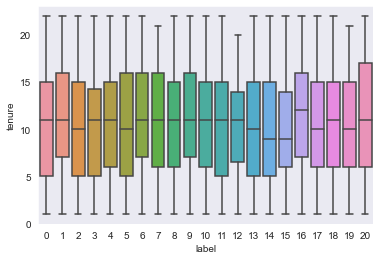

In [577]:
sns.boxplot(x= 'label', y= 'tenure', data= x)

## Cluster Exploration

> VIP Group

In [437]:
rules['cnt_items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['cnt_items']>1].sort_values('lift', ascending=False).head()

antecedents  \
18  (Trek Bicycles Standard medium small 152.54999...   
19  (Norco Bicycles Road medium medium 135.8499999...   
9   (Solex Touring medium large 1408.91, OHM Cycle...   
8   (Solex Touring medium large 1408.91, Giant Bic...   
39  (Solex Standard medium medium 751.02, Solex St...   

                                          consequents  antecedent support  \
18  (Norco Bicycles Road medium medium 135.8499999...            0.014286   
19  (Trek Bicycles Standard medium small 152.54999...            0.020000   
9   (Giant Bicycles Standard medium medium 57.7299...            0.017143   
8   (OHM Cycles Standard high medium 583.270000000...            0.014286   
39  (Trek Bicycles Standard medium medium 110.8099...            0.014286   

    consequent support   support  confidence       lift  leverage  conviction  \
18            0.062857  0.011429    0.800000  12.727273  0.010531    4.685714   
19            0.048571  0.011429    0.571429  11.764706  0.010457    2.220000   
9             0.062857  0.011429    0.666667  10.606061  0.010351    2.811429   
8             0.080000  0.011429    0.800000  10.000000  0.010286    4.600000   
39            0.082857  0.011429    0.800000   9.655172  0.010245    4.585714   

    cnt_items  
18          2  
19          2  
9           2  
8           2  
39          2

In [519]:
encode= mlxtend.preprocessing.TransactionEncoder()
def ClusterExplore(Label):
    global product_df
    global x
    Cluster= x.loc[x['label']== Label]
    product_df_cluster= product_df.loc[product_df.index.isin(Cluster["customer_id"])]
    product_arr_cluster= np.array(product_df_cluster['product_sum'].tolist())
    #print(product_df_cluster)
    
    basket= encode.fit_transform(product_arr_cluster)
    basket= pd.DataFrame(basket, columns= encode.columns_)
    
    #Find out the most popular products of this customer cluster
    Popular= apriori(basket, min_support= 0.05, use_colnames=True)
    print("Popular Product: ", Popular)
    
    #Mine purchasing rules
    frequent_itemsets = apriori(basket, min_support= 0.01, use_colnames=True)
    frequent_itemsets
    rules = association_rules(frequent_itemsets, metric= "conviction", min_threshold= 2)
    print(rules)
    

In [513]:
#Group of VIP Customer
ClusterExplore(2)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys


Popular Product:       support                                           itemsets
0   0.157534        (Giant Bicycles Standard high small 217.51)
1   0.178082     (Giant Bicycles Standard medium large 1055.82)
2   0.150685     (Giant Bicycles Standard medium large 1230.27)
3   0.109589  (Giant Bicycles Standard medium large 41.12999...
4   0.102740      (Giant Bicycles Standard medium large 641.64)
5   0.171233  (Giant Bicycles Standard medium medium 448.679...
6   0.109589      (Giant Bicycles Touring medium large 1010.02)
7   0.102740          (Norco Bicycles Mountain low small 75.75)
8   0.102740  (Norco Bicycles Road high large 309.8099999999...
9   0.102740  (Norco Bicycles Road medium large 445.20999999...
10  0.116438  (Norco Bicycles Road medium medium 167.2099999...
11  0.130137  (Norco Bicycles Standard medium medium 737.569...
12  0.102740     (Norco Bicycles Standard medium medium 817.36)
13  0.157534           (OHM Cycles Standard high medium 802.26)
14  0.253425  (OHM Cyc

In [514]:
#Group of Big Spend Value Customer
ClusterExplore(5)

Popular Product:       support                                           itemsets
0   0.107595  (Giant Bicycles Road low small 64.92999999999995)
1   0.110759  (Giant Bicycles Road medium medium 198.2200000...
2   0.126582  (Giant Bicycles Standard high medium 451.65000...
3   0.126582       (Giant Bicycles Standard high medium 509.97)
4   0.151899  (Giant Bicycles Standard medium medium 448.679...
5   0.110759      (Giant Bicycles Standard medium small 144.26)
6   0.113924      (Giant Bicycles Touring medium large 1010.02)
7   0.101266  (Norco Bicycles Road medium medium 135.8499999...
8   0.120253  (Norco Bicycles Standard high medium 459.46000...
9   0.120253  (Norco Bicycles Standard medium medium 737.569...
10  0.107595     (Norco Bicycles Standard medium medium 817.36)
11  0.120253  (Norco Bicycles Standard medium small 133.7800...
12  0.101266   (OHM Cycles Road medium small 199.0999999999999)
13  0.101266         (OHM Cycles Standard medium medium 693.76)
14  0.101266  (Solex S

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys


In [515]:
#Group of Big Spender 
ClusterExplore(7)

Popular Product:       support                                           itemsets
0   0.125984  (Giant Bicycles Standard medium medium 448.679...
1   0.102362  (OHM Cycles Standard low medium 1544.610000000...
2   0.123360        (OHM Cycles Standard medium medium 1592.19)
3   0.110236  (Solex Standard medium medium 1383.6100000000001)
4   0.131234             (Solex Standard medium medium 1612.25)
5   0.118110               (Solex Touring medium large 1408.91)
6   0.110236          (Trek Bicycles Road medium large 1295.43)
7   0.275591  (Trek Bicycles Standard medium large 1702.5499...
8   0.123360  (WeareA2B Standard medium medium 1069.55000000...
9   0.110236  (WeareA2B Standard medium medium 1230.30000000...
10  0.125984          (WeareA2B Standard medium medium 1660.88)
11  0.104987            (WeareA2B Touring medium large 1305.25)
12  0.120735            (WeareA2B Touring medium large 1630.25)
                                         antecedents  \
0  (Solex Standard medium medi

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys


In [520]:
#Group of VIP Customer
ClusterExplore(9)

Popular Product:       support                                           itemsets
0   0.051064         (Giant Bicycles Road medium medium 709.34)
1   0.076596  (Giant Bicycles Standard high medium 451.65000...
2   0.072340     (Giant Bicycles Standard medium large 1055.82)
3   0.070213     (Giant Bicycles Standard medium large 1230.27)
4   0.063830      (Giant Bicycles Standard medium large 641.64)
5   0.061702  (Giant Bicycles Standard medium medium 431.330...
6   0.087234  (Giant Bicycles Standard medium medium 448.679...
7   0.055319  (Giant Bicycles Standard medium medium 57.7299...
8   0.057447      (Giant Bicycles Standard medium small 144.26)
9   0.051064      (Giant Bicycles Touring medium large 1010.02)
10  0.055319  (Norco Bicycles Road medium medium 167.2099999...
11  0.059574  (Norco Bicycles Standard medium medium 737.569...
12  0.065957     (Norco Bicycles Standard medium medium 817.36)
13  0.055319  (OHM Cycles Standard high medium 583.270000000...
14  0.063830          

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys


In [531]:
from scipy.stats import ks_2samp
import numpy as np

samp1= x.loc[x['label']== 2, 'DOB']
samp2= x.loc[x['label']!=2, "DOB"]
ks_2samp(samp1, samp2)


KstestResult(statistic=0.11806153316445735, pvalue=0.03710555397972359)

> Clearly, diamond customer group which has 146 customers (less than 5%) have significantly younger age than the rest of customers

In [533]:
from scipy.stats import ks_2samp
import numpy as np

samp1= x.loc[x['label']== 2, 'past_3_years_bike_related_purchases']
samp2= x.loc[x['label']==5 | (x['label']== 7), "past_3_years_bike_related_purchases"]
ks_2samp(samp1, samp2)


KstestResult(statistic=0.05080979837673069, pvalue=0.9330622297787665)

In [546]:
x.loc[x['label']== 2, 'job_title'].value_counts().head(20)

Recruiting Manager                      6
Information Systems Manager             5
Marketing Manager                       4
General Manager                         4
Analog Circuit Design manager           3
Cost Accountant                         3
Business Systems Development Analyst    3
Research Nurse                          3
Design Engineer                         3
Project Manager                         3
Food Chemist                            3
Social Worker                           2
Electrical Engineer                     2
Assistant Media Planner                 2
Operator                                2
VP Marketing                            2
Financial Advisor                       2
Occupational Therapist                  2
Accounting Assistant I                  2
Pharmacist                              2
Name: job_title, dtype: int64

In [545]:
x.loc[x['label']== 5, 'job_title'].value_counts().head(20)

Clinical Specialist                     6
Registered Nurse                        5
VP Marketing                            5
Nuclear Power Engineer                  5
Help Desk Operator                      5
Graphic Designer                        5
Business Systems Development Analyst    5
Speech Pathologist                      4
Chief Design Engineer                   4
Analyst Programmer                      4
Senior Sales Associate                  4
Compensation Analyst                    4
Accountant IV                           4
Recruiter                               4
Librarian                               4
Social Worker                           4
Administrative Officer                  4
Software Consultant                     4
Dental Hygienist                        4
Nurse Practicioner                      4
Name: job_title, dtype: int64